# Problem Statement

**Customer churn is a major problem and one of the most important concerns for large companies especially in the telecom sector due to the direct effect on the revenue of the company. Research shows that acquiring a customer is 5 times more costlier than retaining one.**

**Companies are seeking to develop means and tools to predict potential churn customers. Hence, analysing factors that impact customer churn is important to take necessary actions to reduce this churn.**

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data pre-processing

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df["customerID"].duplicated().sum()

0

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop(columns="customerID", inplace=True)

In [7]:
def aon_slab(months):
    if months <= 3: return "00 - 03"
    elif months > 3 and months <= 6: return "04 - 06"
    elif months > 6 and months <= 12: return "07 - 12"
    elif months > 12 and months <= 24: return "13 - 24"
    elif months > 24 and months <= 36: return "25 - 36"
    elif months > 36 and months <= 48: return "37 - 48"
    elif months > 48 and months <= 60: return "49 - 60"
    elif months > 60 and months <= 72: return "61 - 72"

In [8]:
df["AON"] = df["tenure"].apply(aon_slab)

In [9]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
AON                  0
dtype: int64

In [10]:
df = df.astype({"TotalCharges": "float"})

In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(np.nan, 0)

##### Splitting of dataset basis churn

In [12]:
df_churn = df[df["Churn"] == "Yes"]
df_not_churn = df[df["Churn"] == "No"]

# Exploratory Data Analysis

## General Churn Ratio

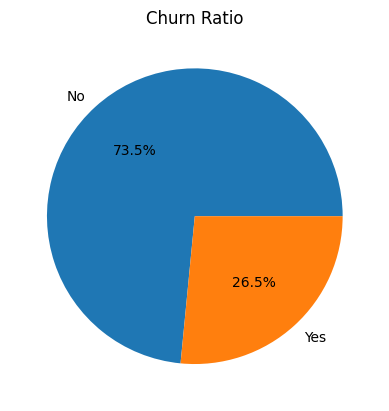

In [13]:
df.groupby("Churn").size().plot(kind="pie", autopct="%1.1f%%", title="Churn Ratio");

---
**The telecom operator has an overall churn of 26.5%**

**The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers. Due to this, predictions will be biased towards Not-Churn customers.**

---

## Demographic Analysis

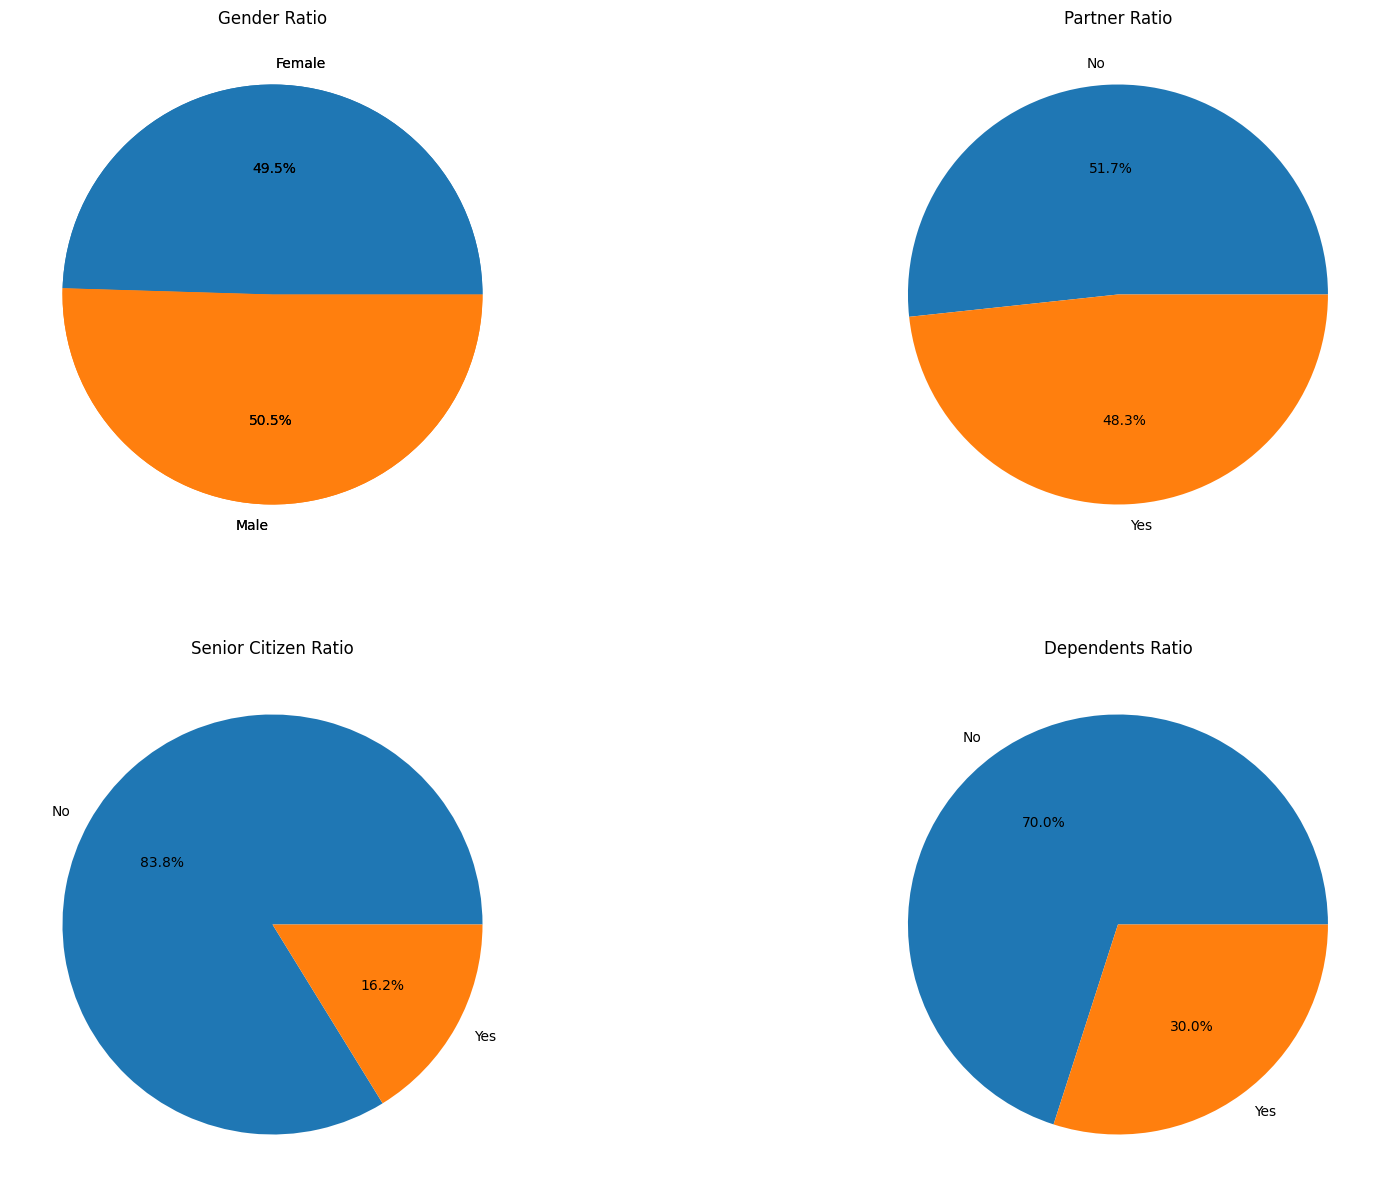

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

df.groupby("gender").size().plot(kind="pie", autopct="%1.1f%%", title="Gender Ratio", ax=axes[0,0]);

cols = ["gender", "Partner", "SeniorCitizen", "Dependents"]
title = ["Gender Ratio", "Partner Ratio", "Senior Citizen Ratio", "Dependents Ratio"]
labels = [["Female", "Male"], ["No", "Yes"], ["No", "Yes"], ["No", "Yes"]]

row = 0
col = 0

for i in range(4):
    df.groupby(cols[i]).size().plot(kind="pie", autopct="%1.1f%%", title=title[i], labels=labels[i], ax=axes[row,col]);
    
    col += 1
    if i == 1:
        col, row = 0, 1

---
1. **Gender and partner composition is almost equally distributed.**
2. **Maximum customers are not a senior citizen - 84%.**
3. **70% customers do not have a dependent.**
---

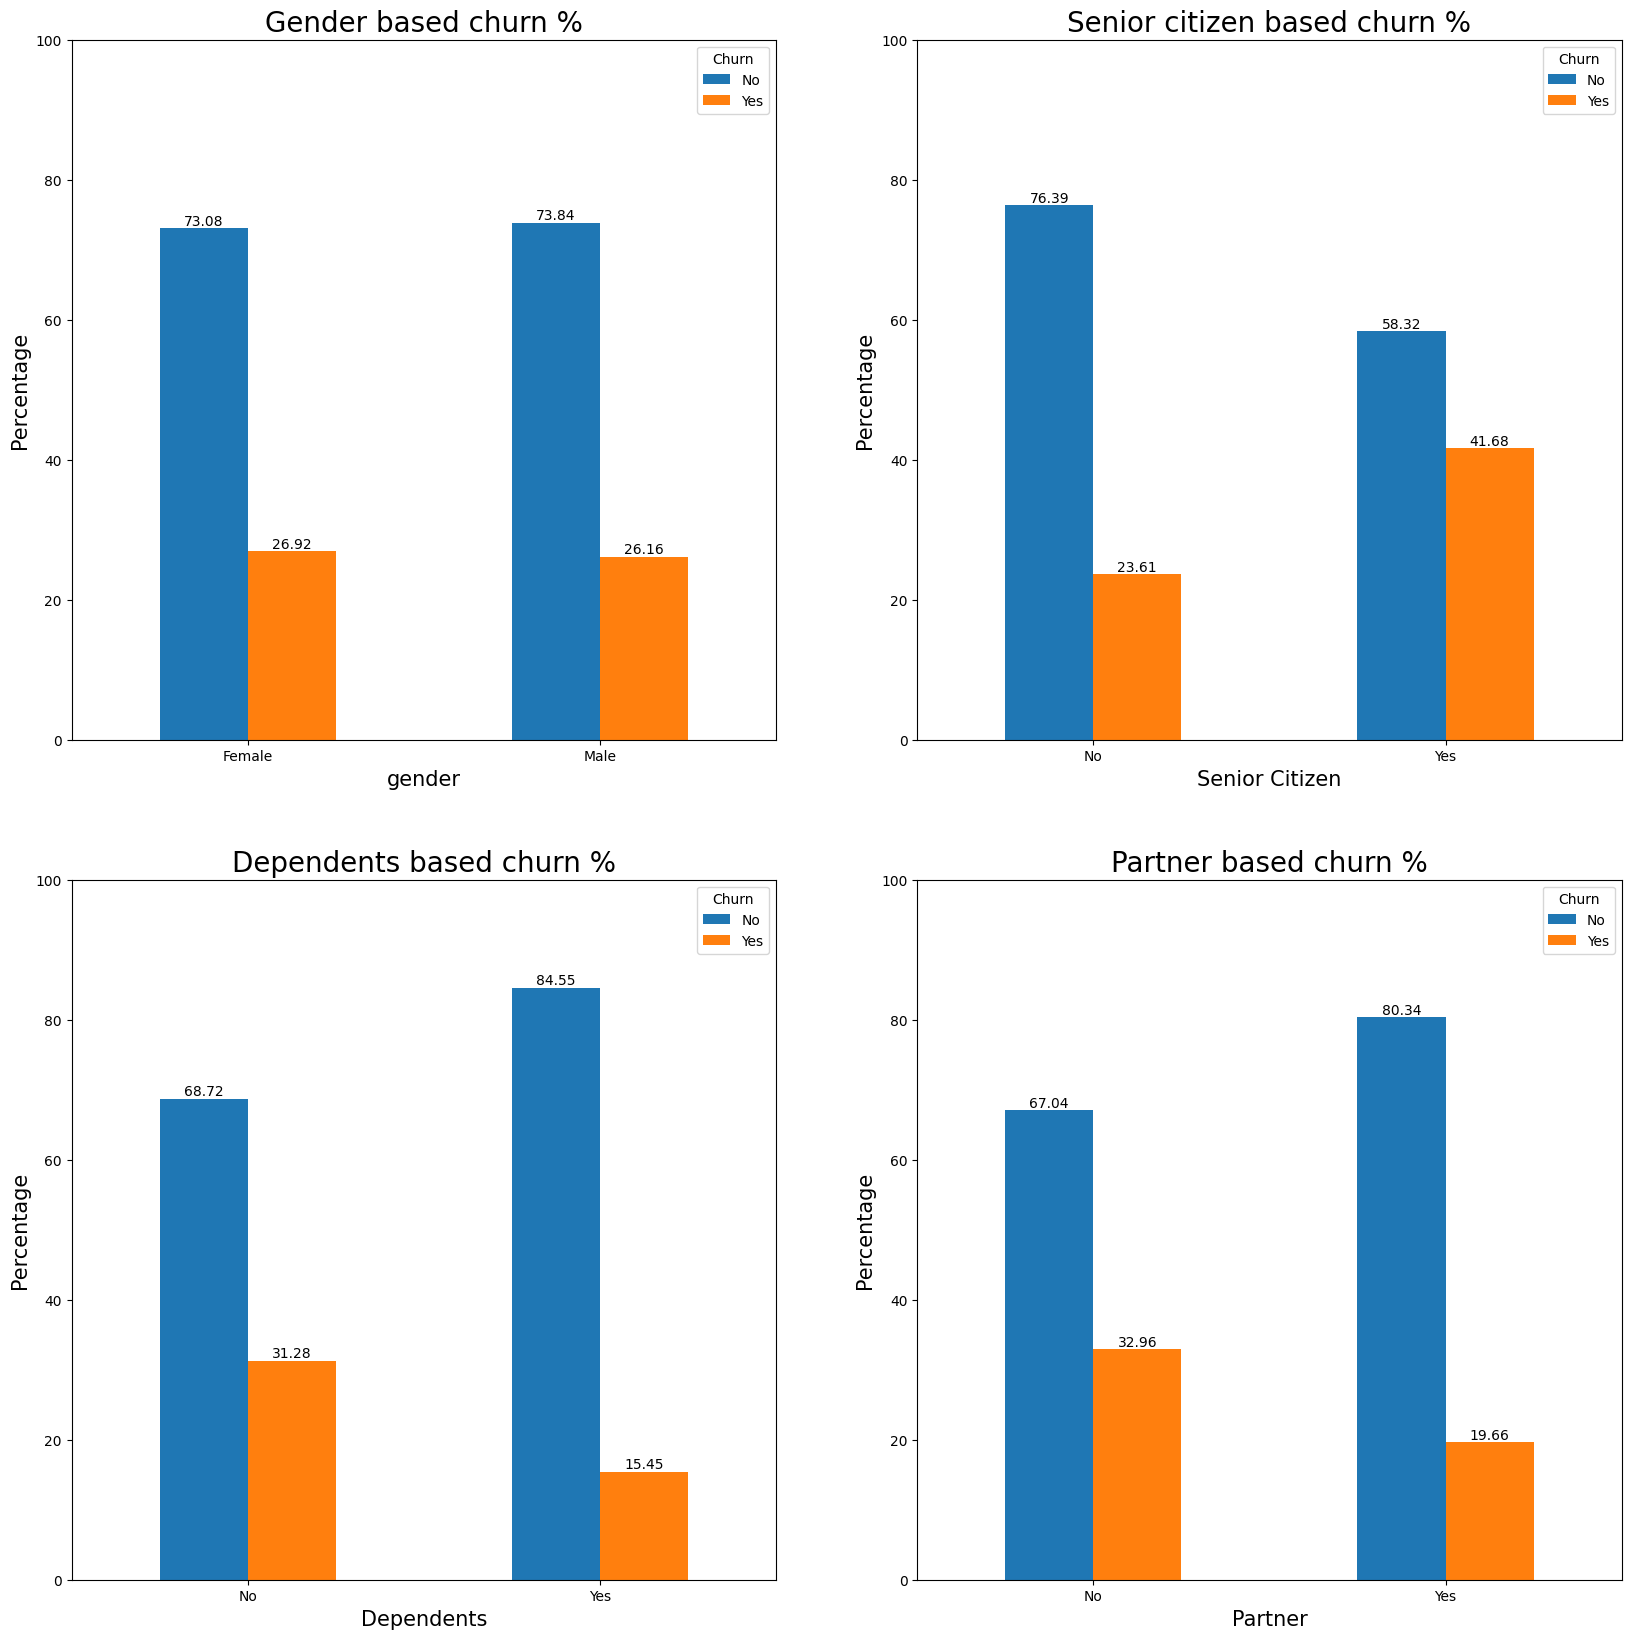

In [15]:
fig, axes = plt.subplots(ncols= 2, nrows=2, figsize=(20, 20))

ax1 = (pd.crosstab(df["gender"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot = 0, ylim=(0, 100), ax = axes[0,0])
ax1.set_ylabel("Percentage")
for container in ax1.containers:
    ax1.bar_label(container)
ax1.legend(loc='upper right', title="Churn")
ax1.set_title("Gender based churn %");
ax1.yaxis.label.set_size(15)
ax1.xaxis.label.set_size(15)
ax1.title.set_size(20);

ax2 = (pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot=0, ylim=(0, 100), ax=axes[0,1])
ax2.set_ylabel("Percentage")
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_xlabel("Senior Citizen")
ax2.set_xticks(ticks=[0,1], labels=["No", "Yes"])
ax2.legend(loc='upper right', title="Churn", labels=["No", "Yes"])
ax2.set_title("Senior citizen based churn %")
ax2.yaxis.label.set_size(15)
ax2.xaxis.label.set_size(15)
ax2.title.set_size(20);

ax3 = (pd.crosstab(df["Dependents"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot=0, ylim=(0, 100), ax=axes[1,0])
for container in ax3.containers:
    ax3.bar_label(container)
ax3.set_ylabel("Percentage")
ax3.legend(loc='upper right', title="Churn")
ax3.set_title("Dependents based churn %")
ax3.yaxis.label.set_size(15)
ax3.xaxis.label.set_size(15)
ax3.title.set_size(20);

ax4 = (pd.crosstab(df["Partner"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot=0, ylim=(0, 100), ax=axes[1,1])
for container in ax4.containers:
    ax4.bar_label(container)
ax4.set_ylabel("Percentage")
ax4.legend(loc='upper right',title="Churn")
ax4.set_title("Partner based churn %")
ax4.yaxis.label.set_size(15)
ax4.xaxis.label.set_size(15)
ax4.title.set_size(20);

---
1. **There is no major impact in churn basis gender.**
2. **Senior citizen customers have a higher percentage of churn.**
3. **Customers with no dependents or no partner churn more.**
___


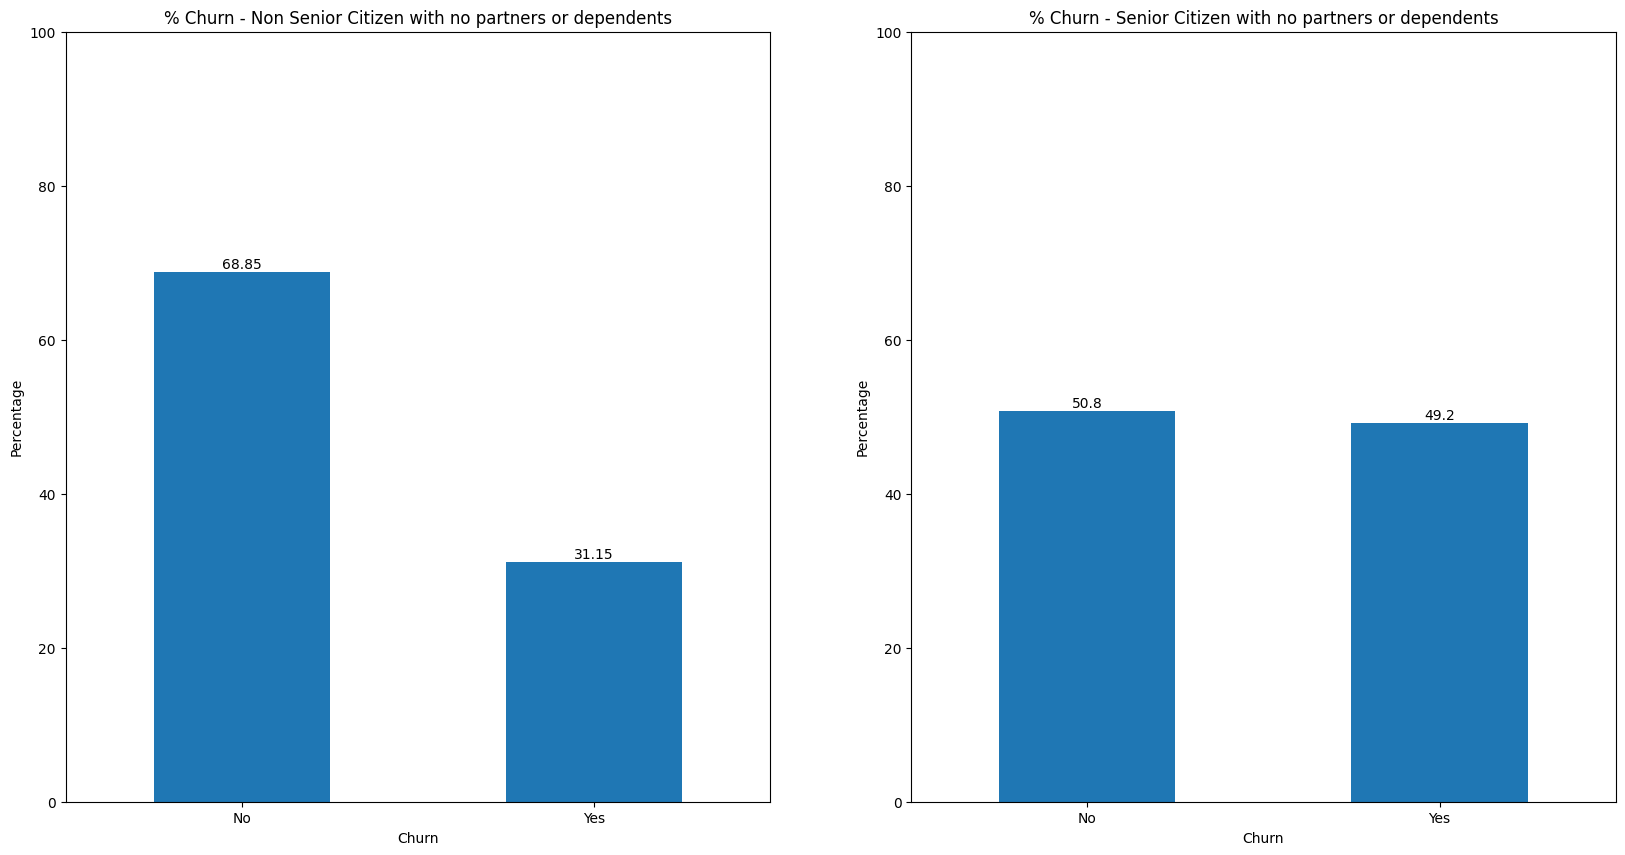

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

titles = ["% Churn - Non Senior Citizen with no partners or dependents", "% Churn - Senior Citizen with no partners or dependents"]

for i in range(2):
    tmp = df[(df["SeniorCitizen"] == i) & (df["Dependents"] == "No") & (df["Partner"] == "No")]["Churn"].value_counts()
    ax = (tmp/tmp.sum()*100).round(2).plot.bar(rot=0, ax=axes[i], ylim=(0, 100))

    for container in ax.containers:
        ax.bar_label(container)

    ax.set_ylabel("Percentage")
    ax.set_title(titles[i]);

___
**Approximately 50% of senior citizens having no partner or dependents churn out. This might be due to the fact that they are free to move to other operators without any obligation to others.**
___

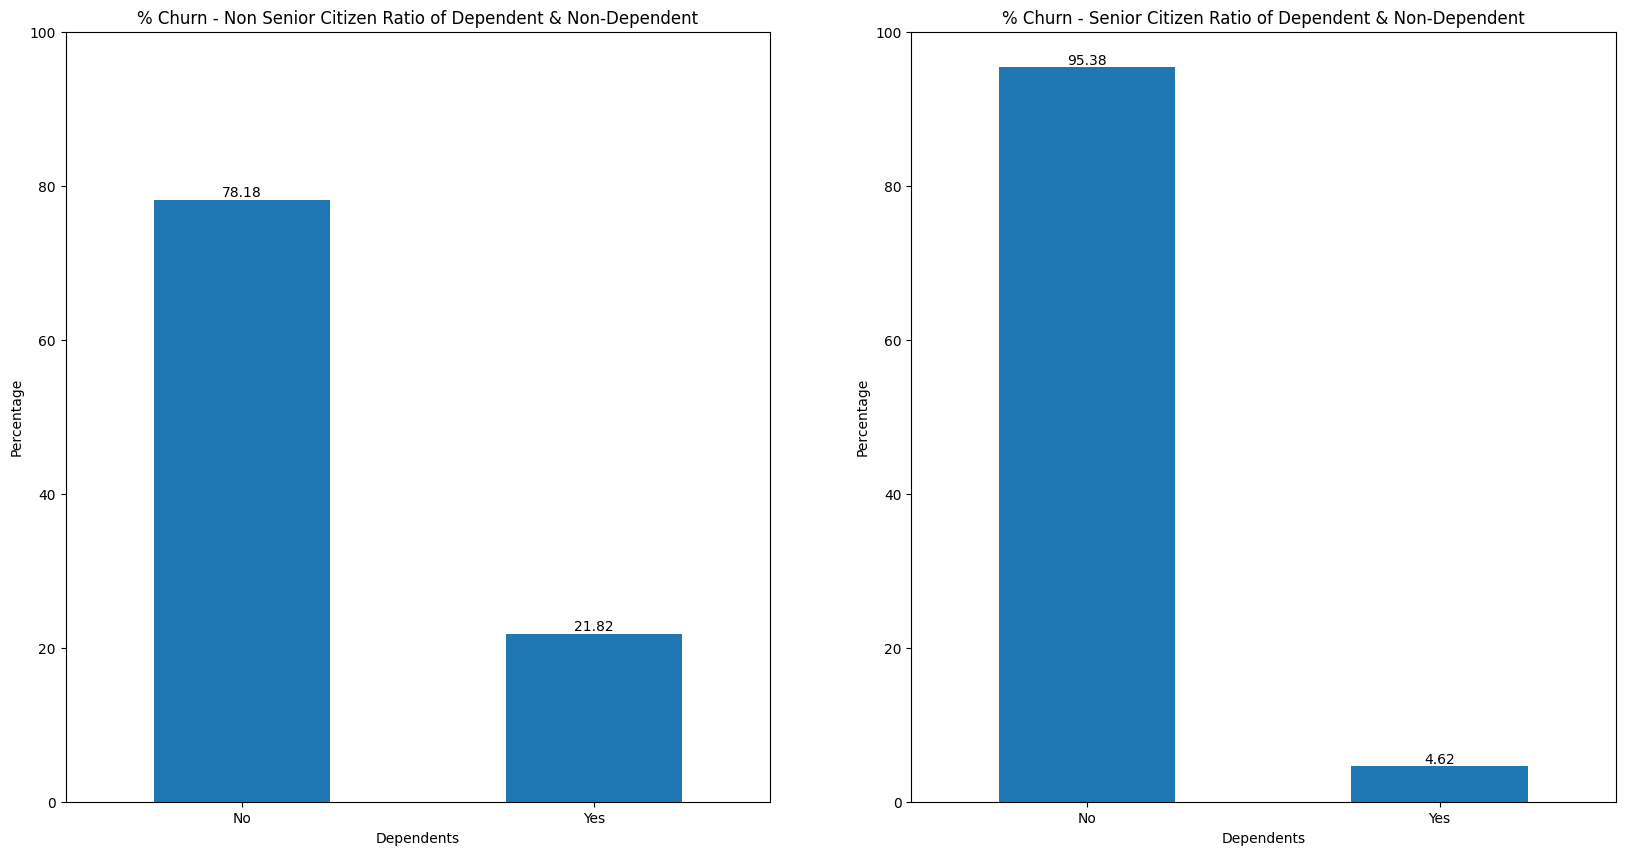

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

titles = ["% Churn - Non Senior Citizen Ratio of Dependent & Non-Dependent", "% Churn - Senior Citizen Ratio of Dependent & Non-Dependent"]

for i in range(2):
    
    tmp = df[(df["SeniorCitizen"] == i) & (df["Churn"] == "Yes")]["Dependents"].value_counts()
    ax = (tmp/tmp.sum()*100).round(2).plot.bar(rot=0, ax=axes[i], ylim=(0, 100))

    for container in ax.containers:
        ax.bar_label(container)

    ax.set_ylabel("Percentage")
    ax.set_title(titles[i]);

---
- **Dependent as a parameter cannot be influenced by the operator.**
- **Senior citizen with no dependents and with high churn need to be further analysed to identify if churn is during their life cycle or due to deaths.**
___

## Outlier Analysis

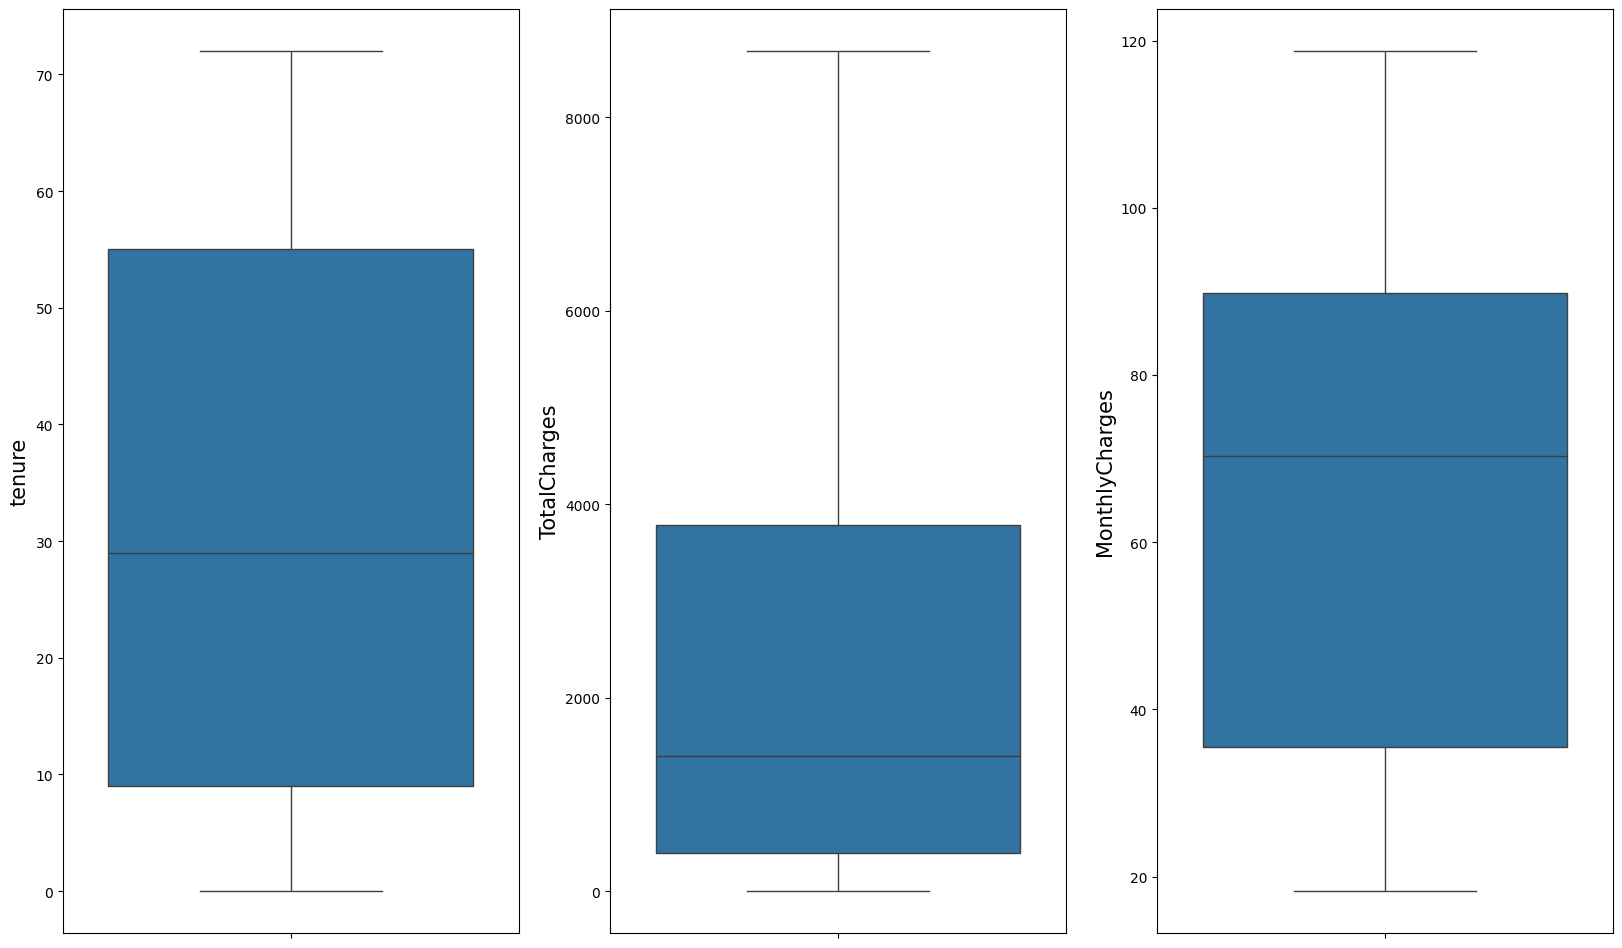

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 12))

cols = ["tenure", "TotalCharges", "MonthlyCharges"]

for i in range(3):
    sns.boxplot(data=df, y=cols[i], ax=axes[i]);
    axes[i].yaxis.label.set_size(15)

___
**There are no outliers in the above three data columns.**
___

## Feature Analysis

### Customer spread across Age On Network

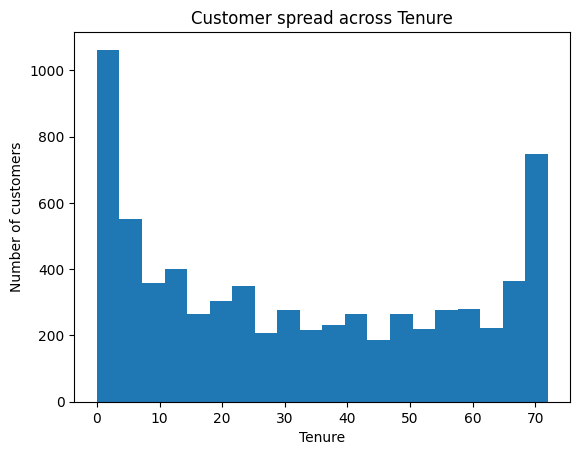

In [19]:
plt.hist(df["tenure"], bins=20)
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer spread across Tenure");

___
**There is a high focus on new acquisitions**
___

/var/folders/gw/6_tkq4n57_nc8ff1z308kvqr0000gp/T/ipykernel_2047/3188960041.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['{} %'.format(x) for x in vals])


,AON,Count,Churn Rate
0,00 - 03,1062,56.21
1,04 - 06,419,44.63
2,07 - 12,705,35.89
3,13 - 24,1024,28.71
4,25 - 36,832,21.63
5,37 - 48,762,19.03
6,49 - 60,832,14.42
7,61 - 72,1407,6.61


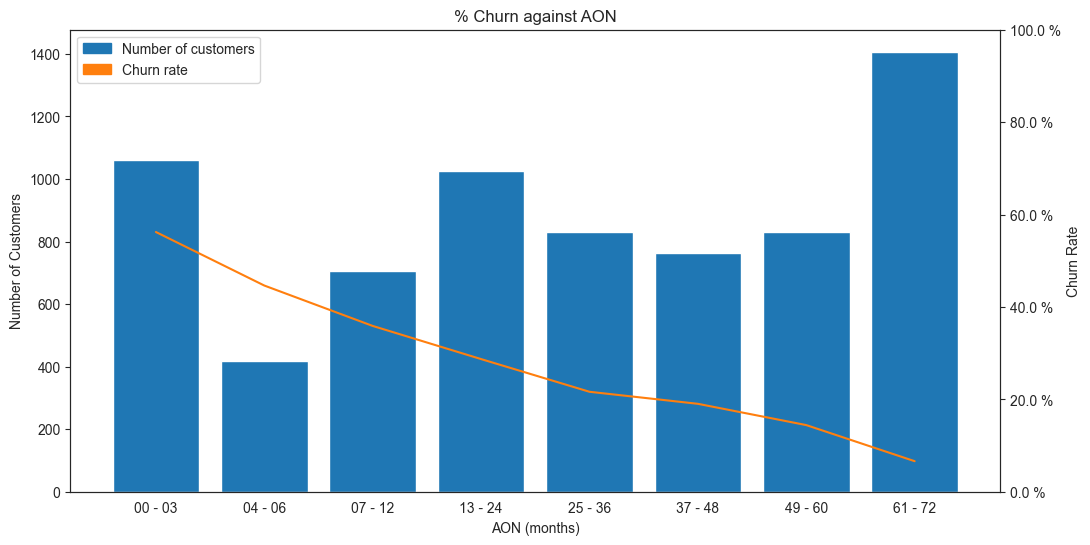

In [20]:
sns.set_style("white")

fig, ax1 = plt.subplots(figsize=(12, 6))
temp1 = df.groupby("AON")["Churn"].count()
plt.bar(x=temp1.index, height=temp1.values, label="Number of customers" )
ax1.set_ylabel("Number of Customers")
ax1.set_xlabel("AON (months)")

ax2 = ax1.twinx()
ax2.set_ylim(0, 100)
temp2 = (pd.crosstab(df["AON"], df["Churn"], normalize="index")["Yes"]*100).reset_index()
plt.plot(temp2["AON"], temp2["Yes"], c="#ff7f0e", label="Churn Rate")
vals = ax2.get_yticks()
ax2.set_ylabel("Churn Rate")
ax2.set_yticklabels(['{} %'.format(x) for x in vals])

blue_patch = mpatches.Patch(color='#1f77b4', label='Number of customers')
orange_patch = mpatches.Patch(color='#ff7f0e', label='Churn rate')
plt.legend(handles=[blue_patch, orange_patch], loc="upper left")
plt.title("% Churn against AON");

pd.concat([temp1, temp2.set_index("AON")], axis=1).round(2).reset_index().rename(columns={"Churn": "Count", "Yes": "Churn Rate"})

___
- **Quality of acquisition is a concern as only 44% of new customers after 3 months choose to stay with the current telecom operator, whereas customers with higher AON are loyal.**
- **Churn % is a reducing trend against AON.**
___

In [21]:
df_3 = df[df["AON"] == "00 - 03"]
df_3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AON
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,00 - 03
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,00 - 03
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,00 - 03
20,Male,1,No,No,1,No,No phone service,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,00 - 03
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,00 - 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes,00 - 03
7016,Female,0,No,No,1,Yes,No,DSL,No,Yes,...,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No,00 - 03
7018,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,00 - 03
7030,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No,00 - 03


,AON,Percentage
0,00 - 03,31.94
1,04 - 06,10.01
2,07 - 12,13.54
3,13 - 24,15.73
4,25 - 36,9.63
5,37 - 48,7.76
6,49 - 60,6.42
7,61 - 72,4.98


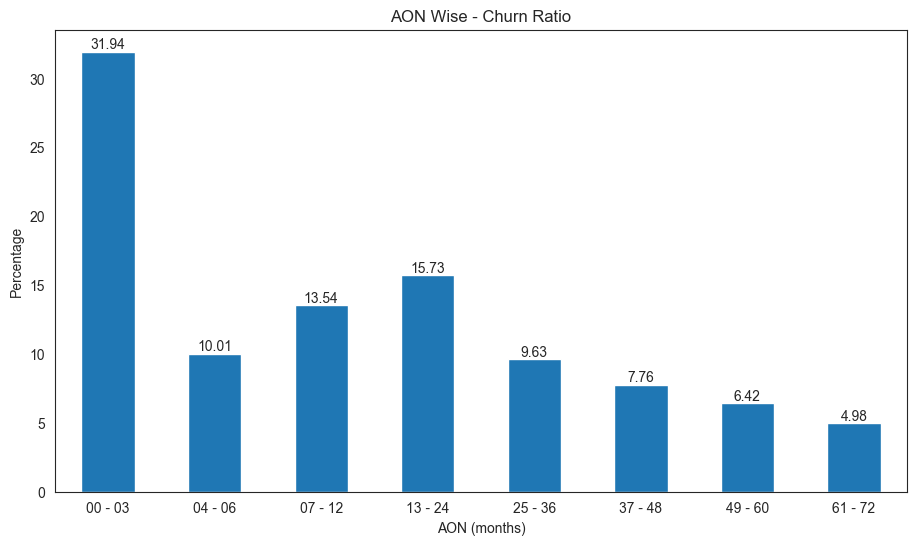

In [22]:
a = (((df_churn["AON"].sort_values().value_counts(sort=False)))/(df_churn["AON"].value_counts().sum())*100).round(2).plot(kind="bar", figsize=(11, 6))
plt.xticks(rotation=0)
plt.xlabel("AON (months)")
plt.ylabel("Percentage")
plt.title("AON Wise - Churn Ratio");

for container in a.containers:
    a.bar_label(container)

(((df_churn["AON"].sort_values().value_counts(sort=False)))/(df_churn["AON"].value_counts().sum())*100).round(2).reset_index().rename(columns={"count": "Percentage"})

___
**Maximum number of customers churned are under 3 months of usage.**

**There is a sharp decline after 3 months in the churn rate.**
___

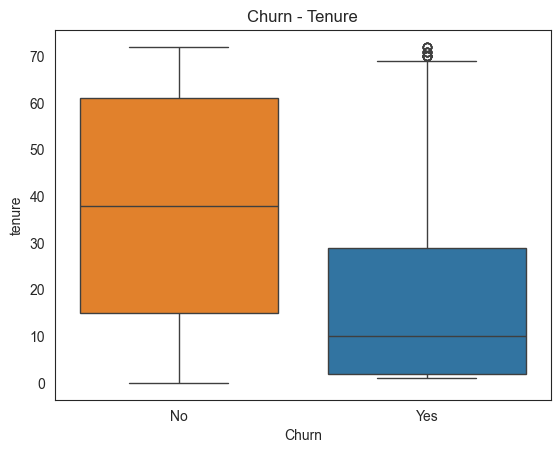

In [23]:
sns.boxplot(data=df, x="Churn", y="tenure", palette=["#ff7f0e", "#1f77b4"])

plt.title("Churn - Tenure");

___
- **50% of the customers who left the service did so in the first 10 months.** 

- **This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out.**
___

### Phone Service

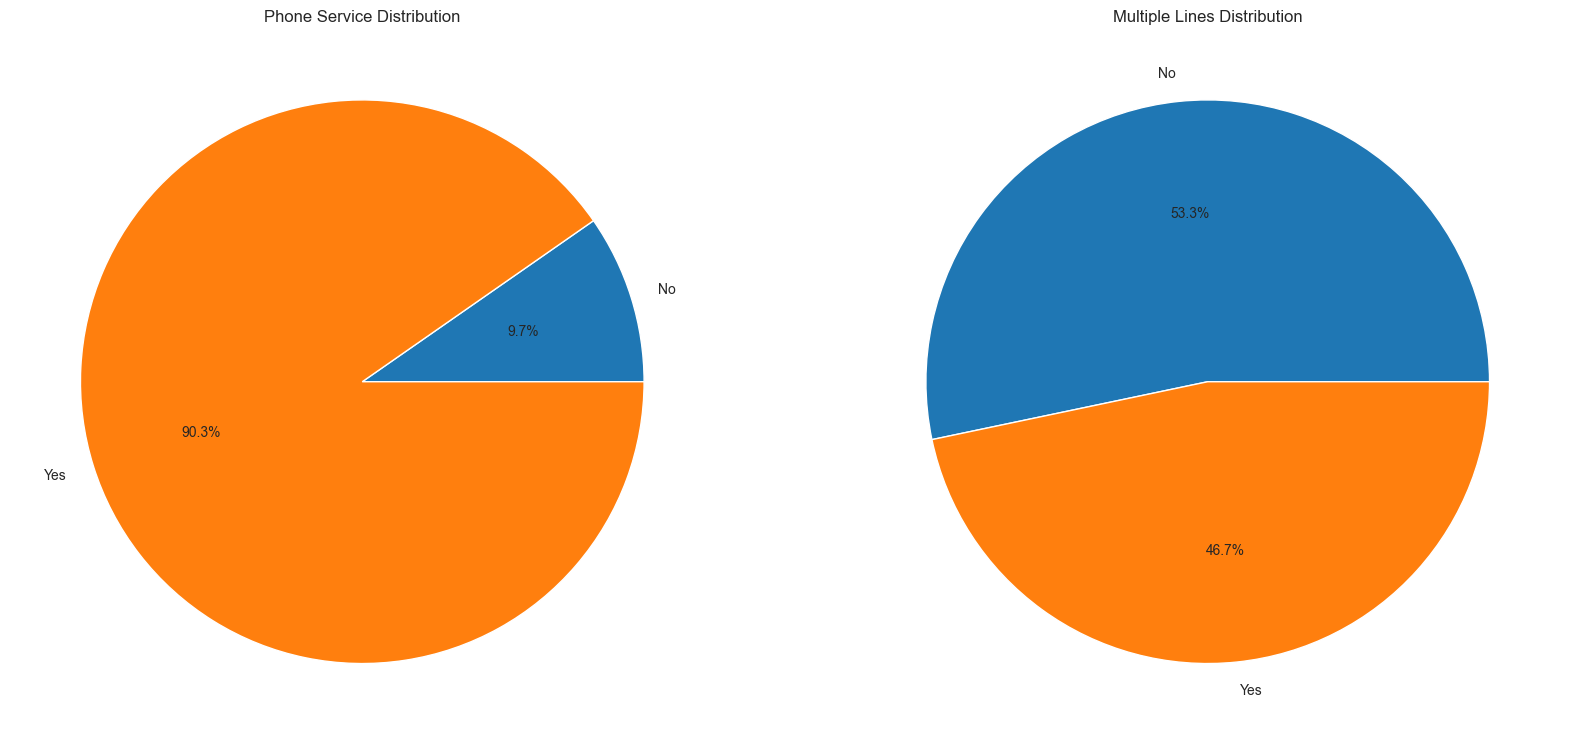

In [24]:
fig, axes = plt.subplots(ncols =2, figsize=(20, 10))
df.groupby("PhoneService").size().plot(kind="pie", autopct="%1.1f%%", labels=["No", "Yes"], title="Phone Service Distribution", ax=axes[0]);
df[df["PhoneService"] == "Yes"].groupby("MultipleLines").size().plot(kind="pie", autopct="%1.1f%%", labels=["No", "Yes"], title="Multiple Lines Distribution");

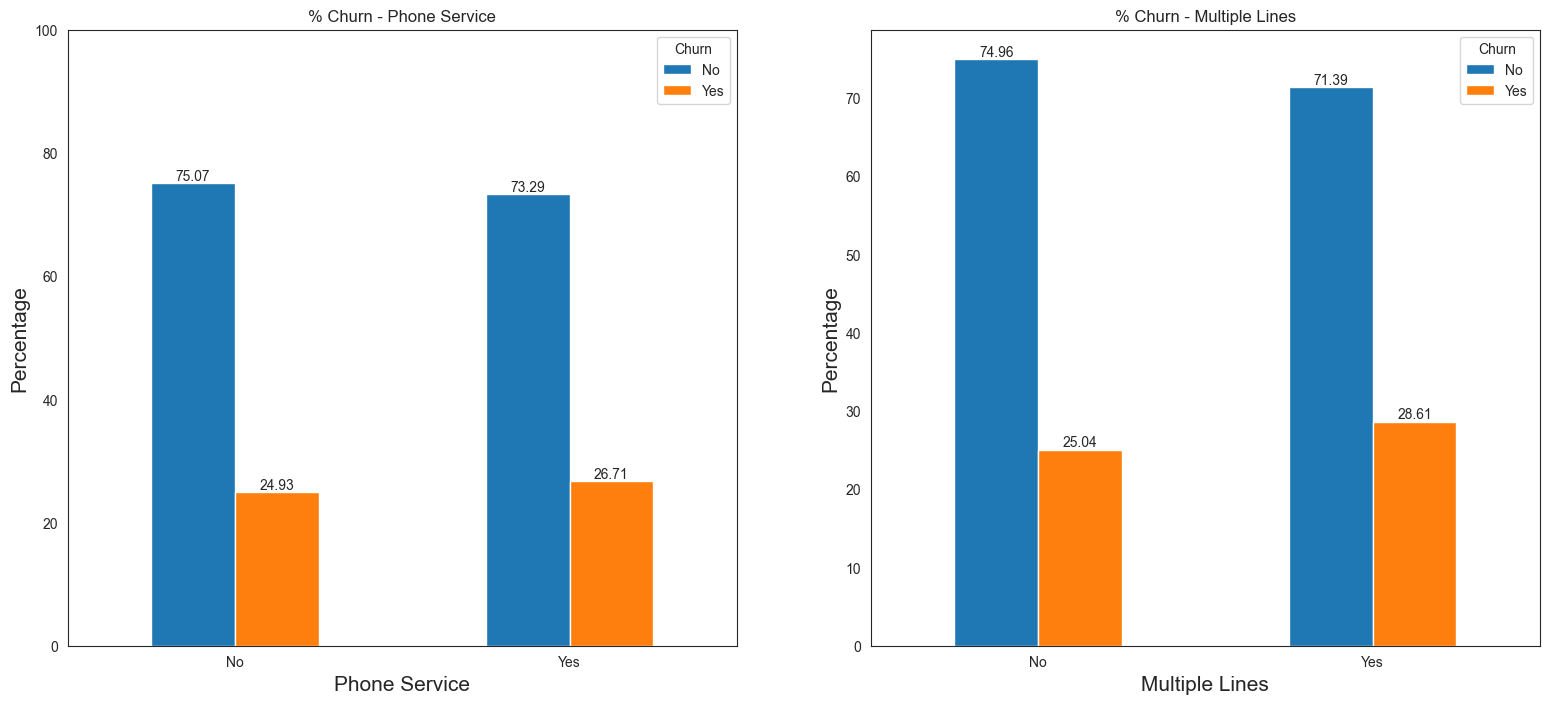

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(19, 8))

ax1 = (pd.crosstab(df["PhoneService"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot=0, ylim=(0, 100), ax=axes[0])
ax1.legend(loc='upper right', title="Churn")
ax1.set_xlabel("Phone Service")
ax1.set_ylabel("Percentage")

for container in ax1.containers:
    ax1.bar_label(container)
ax1.yaxis.label.set_size(15)
ax1.xaxis.label.set_size(15)
ax1.set_title("% Churn - Phone Service");

ax2 = (pd.crosstab(df[df["PhoneService"] != "No"]["MultipleLines"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot = 0, ax=axes[1])
ax2.legend(loc='upper right', title="Churn")
ax2.set_xlabel("Multiple Lines")
ax2.set_ylabel("Percentage")

for container in ax2.containers:
    ax2.bar_label(container)
ax2.yaxis.label.set_size(15)
ax2.xaxis.label.set_size(15)
ax2.set_title("% Churn - Multiple Lines");

___
- **There is no significant difference in churn percentage for customers subscribing to phone vs non-subscription.**
- **Multiple line subscription within phone service also have a equal distribution of churn with customers who do not have multiple lines.**
___

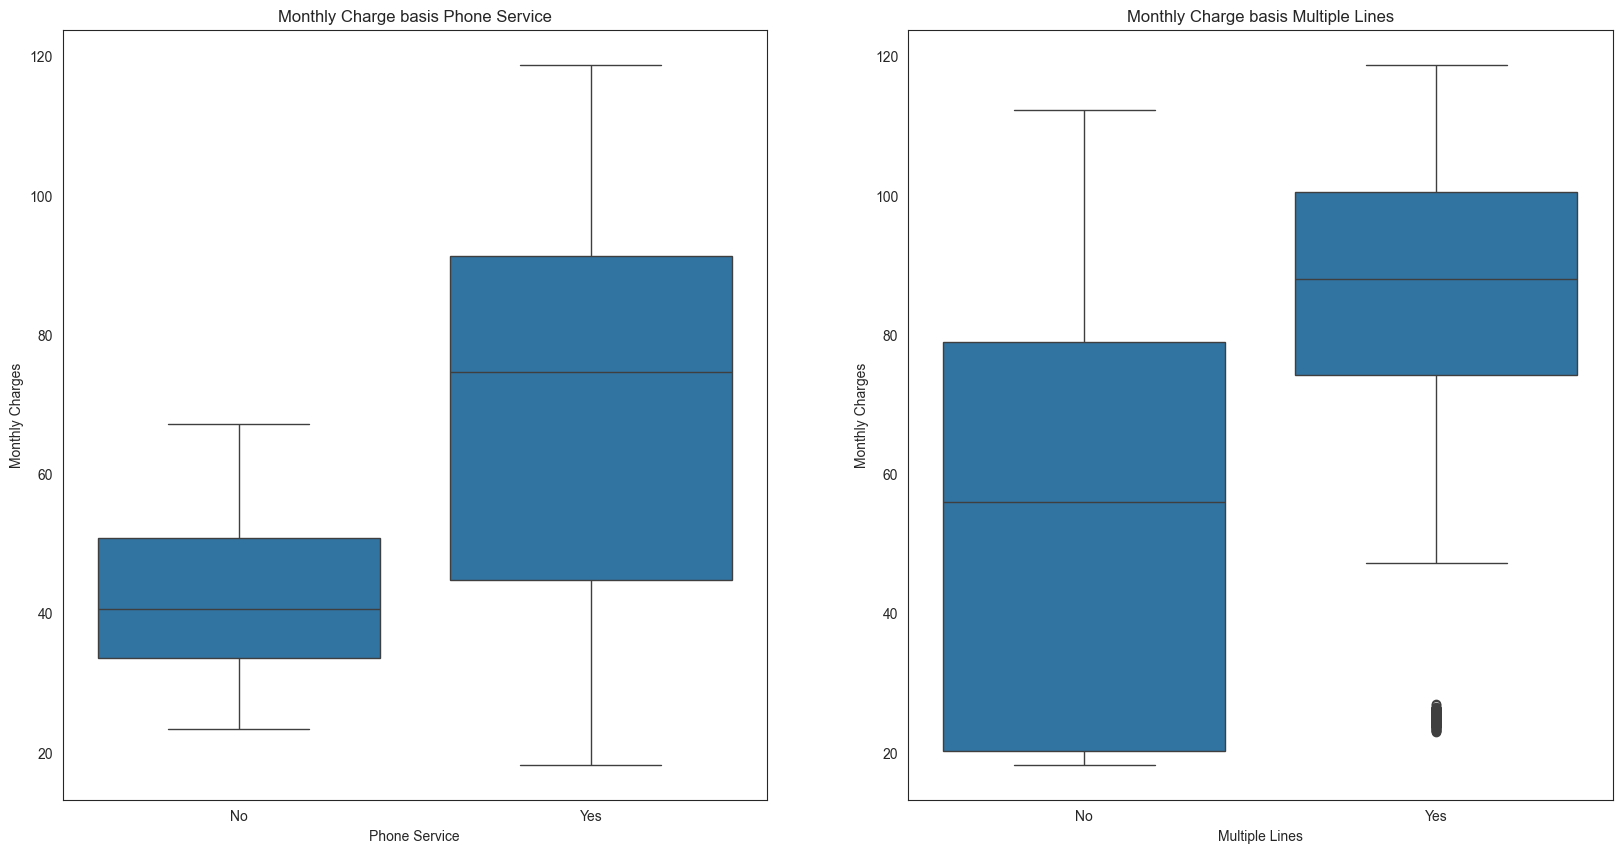

In [26]:
fig,axes = plt.subplots(ncols=2, figsize=(20, 10))

ax1 = sns.boxplot(data=df, x="PhoneService", y="MonthlyCharges", ax=axes[0])
ax1.set_ylabel("Monthly Charges")
ax1.set_xlabel("Phone Service")
ax1.set_title("Monthly Charge basis Phone Service");

ax2 = sns.boxplot(data=df[df["PhoneService"] != "No"], x="MultipleLines", y="MonthlyCharges", ax=axes[1])
ax2.set_ylabel("Monthly Charges")
ax2.set_xlabel("Multiple Lines")
ax2.set_title("Monthly Charge basis Multiple Lines");

___
**As expected the monthly charge for customers availing phone service is high in comparision to customers not subscribing and similarly for subscribers with multiple lines have a high monthly charge.**
___

### Internet Service

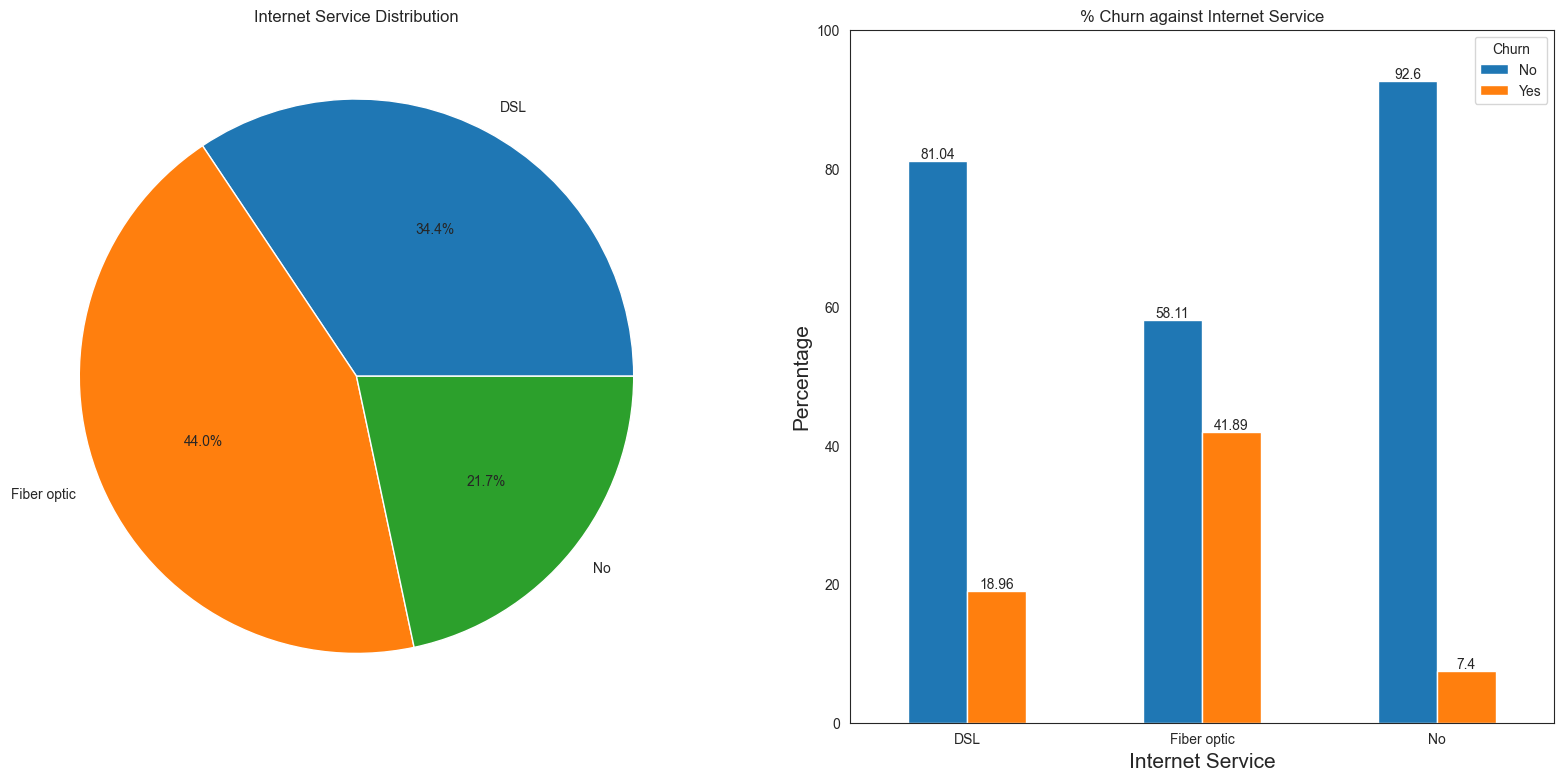

In [27]:
fig, axes = plt.subplots(ncols = 2, figsize=(20, 9))

ax1 = df.groupby("InternetService").size().plot(kind="pie", autopct="%1.1f%%", title="Internet Service Distribution", ax=axes[0]);

ax2 = (pd.crosstab(df["InternetService"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot=0, ylim=(0, 100), ax=axes[1])
ax2.legend(loc='upper right', title="Churn")
ax2.set_ylabel("Percentage")
ax2.set_xlabel("Internet Service")
for container in ax2.containers:
    ax2.bar_label(container)
ax2.yaxis.label.set_size(15)
ax2.xaxis.label.set_size(15)
ax2.set_title("% Churn against Internet Service");

___
**Maximum number of customers have adopted fiber optics as their mode of internet service and also have a high percentage of churn in comparison to DSL service.**
___

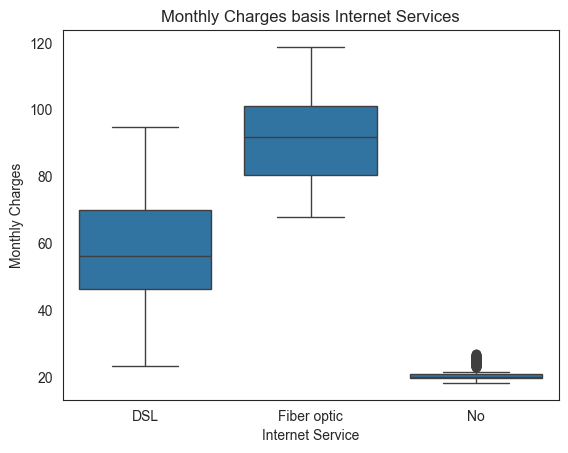

In [28]:
sns.boxplot(data=df, x="InternetService", y="MonthlyCharges")
plt.ylabel("Monthly Charges")
plt.xlabel("Internet Service")
plt.title("Monthly Charges basis Internet Services");

___
**Fiber optic service have a higher charge and churn % in comparison to DSL which is in sync to high churn percentage in customers with a high monthly charge.**
___

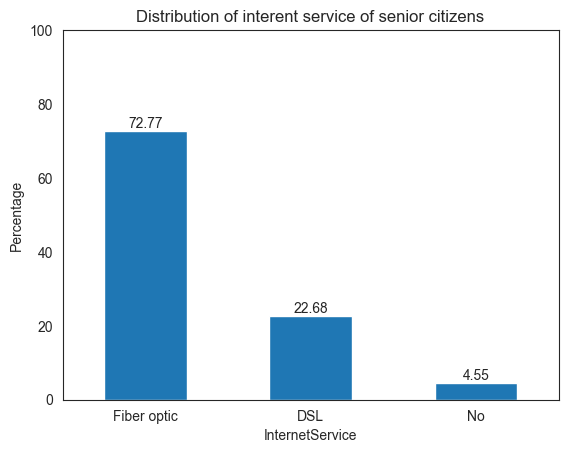

In [29]:
tmp = df[df["SeniorCitizen"] == 1]["InternetService"].value_counts()
ax = (tmp/tmp.sum()*100).round(2).plot.bar(rot=0, ylim=(0, 100), title="Distribution of interent service of senior citizens", ylabel="Percentage");

for container in ax.containers:
    ax.bar_label(container)

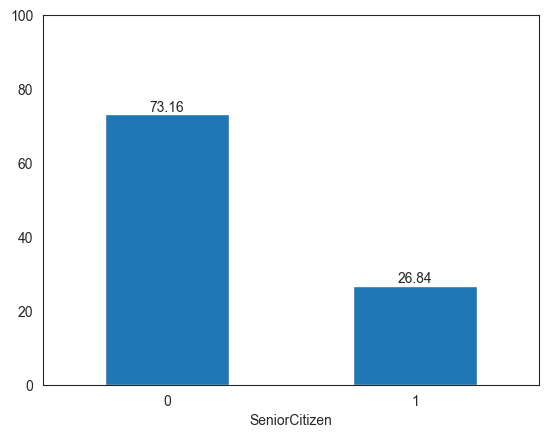

In [30]:
tmp = df[df["InternetService"] == "Fiber optic"]["SeniorCitizen"].value_counts()
ax = (tmp/tmp.sum()*100).round(2).plot.bar(rot=0, ylim=(0, 100))
for container in ax.containers:
    ax.bar_label(container)

___
**73% of senior citizens opt for the fiber optic as their choice of internet service, which makes up 27% of the total market of fiber optics**
___

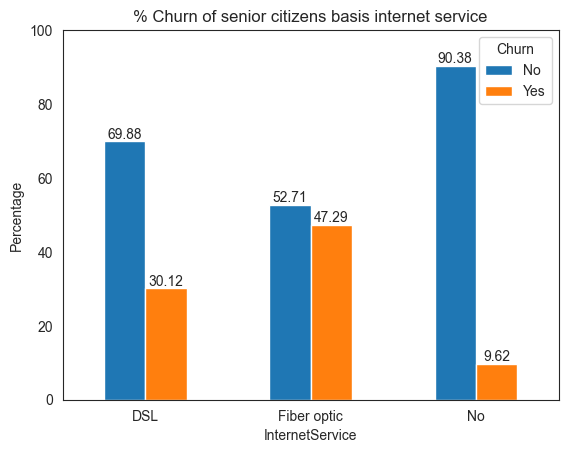

In [31]:
ax = (pd.crosstab( df[df["SeniorCitizen"] == 1]["InternetService"], df[df["SeniorCitizen"] == 1]["Churn"], normalize="index")*100).round(2).plot.bar(ylim=(0, 100), rot=0, title="% Churn of senior citizens basis internet service", ylabel="Percentage");
for container in ax.containers:
    ax.bar_label(container)

___
**Nearly 50% of the senior citizens with fiber optic as their internet service churn out, suggesting that the operator must certainly focus on the senior citizen customer segement using this service.**
___

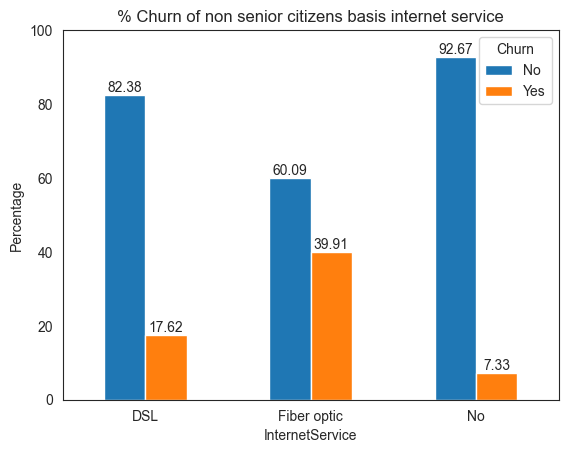

In [32]:
ax = (pd.crosstab( df[df["SeniorCitizen"] == 0]["InternetService"], df[df["SeniorCitizen"] == 0]["Churn"], normalize="index")*100).round(2).plot.bar(ylim=(0, 100), rot=0, title="% Churn of non senior citizens basis internet service", ylabel="Percentage");
for container in ax.containers:
    ax.bar_label(container)

___
- **40% of non-senior citizen with fiber optics also churn out.**
- **This indicates that the problem is with the fiber optics rather than any age segment.**
___

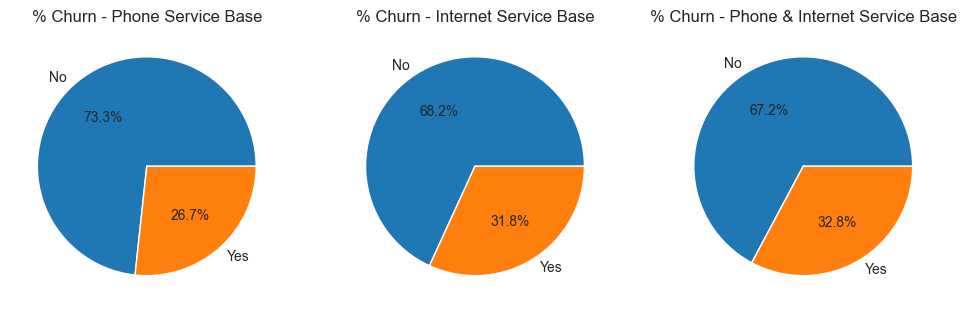

In [33]:
fig, axes = plt.subplots(ncols = 3, figsize=(12, 5))

df[df["PhoneService"] == "Yes"].groupby("Churn").size().plot(kind="pie", autopct="%1.1f%%", ax=axes[0], title="% Churn - Phone Service Base")
df[df["InternetService"] != "No"].groupby("Churn").size().plot(kind="pie", autopct="%1.1f%%", ax=axes[1], title="% Churn - Internet Service Base")
df[(df["PhoneService"] == "Yes") & (df["InternetService"] != "No")].groupby("Churn").size().plot(kind="pie", autopct="%1.1f%%", ax=axes[2], title="% Churn - Phone & Internet Service Base");

___
**Customer with internet service have a higher churn percentage as compared to customer with only phone service.**
___

### Addon Services within Internet Service

In [34]:
df['Number of Additional Services'] = (df[['OnlineSecurity','OnlineBackup','DeviceProtection',
                                           'TechSupport','StreamingTV','StreamingMovies']]=="Yes").sum(axis=1)

/var/folders/gw/6_tkq4n57_nc8ff1z308kvqr0000gp/T/ipykernel_2047/2777505033.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['{} %'.format(x) for x in vals])


,Number of Additional Services,Count,Churn Rate
0,0,2219,21.41
1,1,966,45.76
2,2,1033,35.82
3,3,1118,27.37
4,4,852,22.30
5,5,571,12.43
6,6,284,5.28


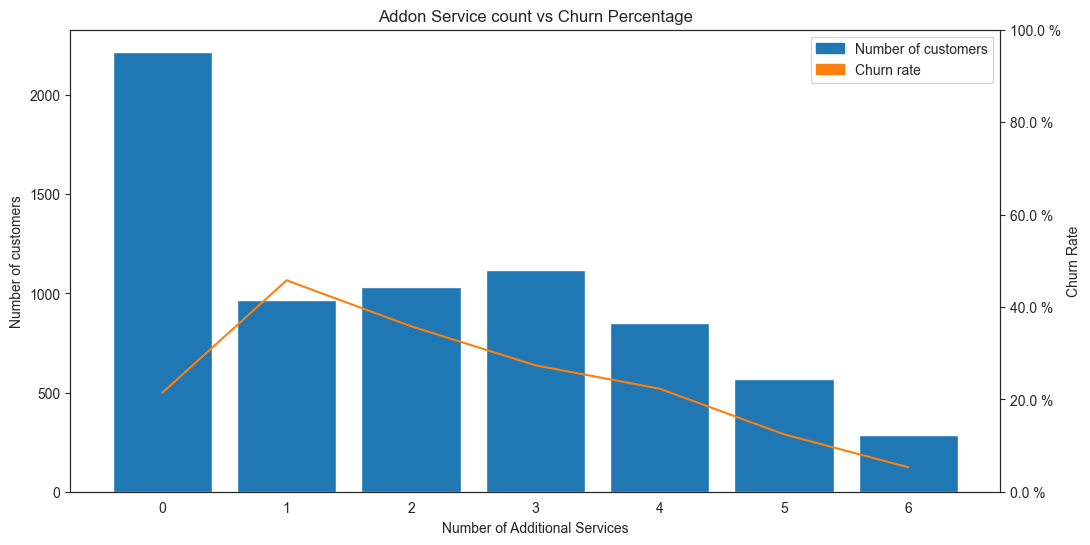

In [35]:
sns.set_style("white")

fig, ax1 = plt.subplots(figsize=(12, 6))
temp1 = df.groupby("Number of Additional Services")["Churn"].count()
plt.bar(x=temp1.index, height=temp1.values, label="Number of Additional Services" )
ax1.set_ylabel("Number of customers")
ax1.set_xlabel("Number of Additional Services")

ax2 = ax1.twinx()
ax2.set_ylim(0, 100)
temp2 = (pd.crosstab(df["Number of Additional Services"], df["Churn"], normalize="index")["Yes"]*100).reset_index()
plt.plot(temp2["Number of Additional Services"], temp2["Yes"], c="#ff7f0e", label="Churn Rate")
vals = ax2.get_yticks()
ax2.set_ylabel("Churn Rate")
ax2.set_yticklabels(['{} %'.format(x) for x in vals])

blue_patch = mpatches.Patch(color='#1f77b4', label='Number of customers')
orange_patch = mpatches.Patch(color='#ff7f0e', label='Churn rate')
plt.legend(handles=[blue_patch, orange_patch], loc="upper right");
plt.title("Addon Service count vs Churn Percentage")

pd.concat([temp1, temp2.set_index("Number of Additional Services")], axis=1).round(2).reset_index().rename(columns={"Churn": "Count", "Yes": "Churn Rate"})

___
**Churn percentage reduces with increase in additional services, highest in customers with only one additional services.**
___

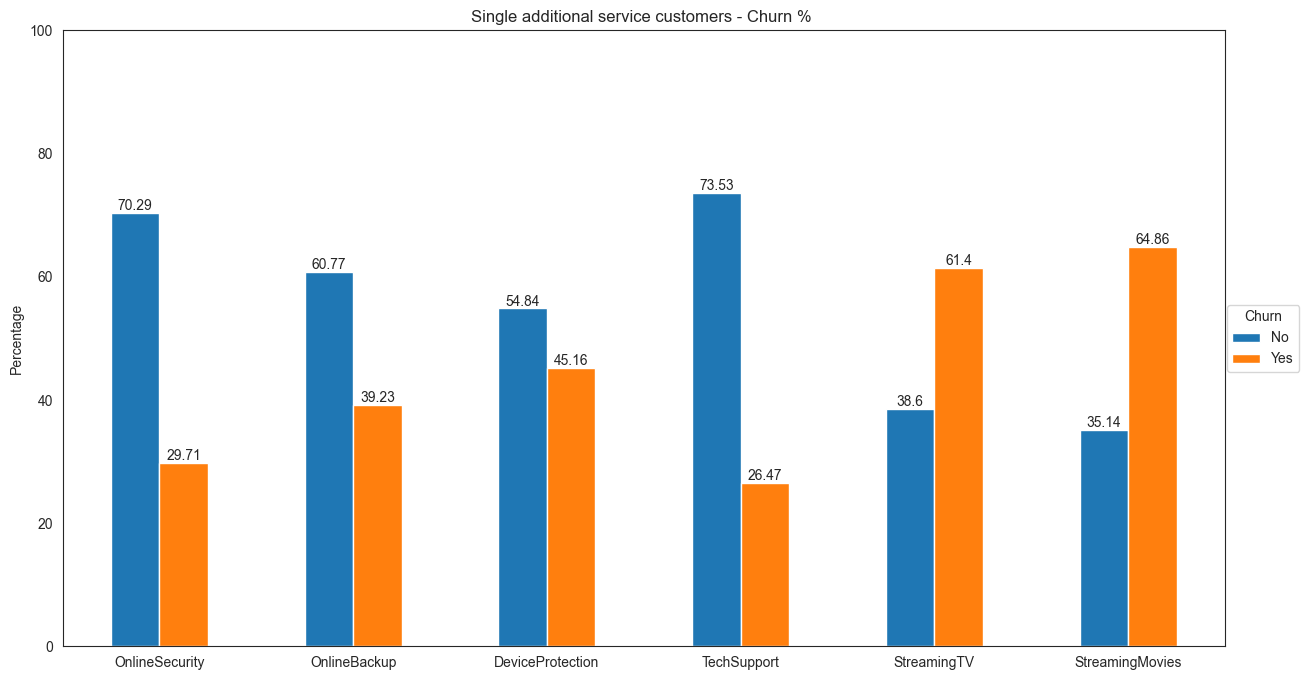

In [36]:
df_temp = (df[df["Number of Additional Services"] == 1].replace({"Yes": 1, "No": 0})).groupby("Churn")[["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]].sum()
for column in df_temp.columns:
    df_temp[column] = (df_temp[column]/(df_temp[column].sum())*100).round(2)
ax = df_temp.transpose().plot.bar(ylim=(0, 100), figsize=(15, 8), ylabel="Percentage", rot=0)
ax.set_figsize=(20, 10)
plt.legend(loc='center right', bbox_to_anchor=(1.07, 0.5), title="Churn", labels=["No", "Yes"])
plt.title("Single additional service customers - Churn % ")

for container in ax.containers:
    ax.bar_label(container);

___
- **Quality of Streaming Services seems to be a serious concern as they have high churn percentage > 60 % which should be evaluated by the operator to take corrective action.**
- **Customers with online security and tech support have a lower churn percentage which could be a strong point of the operator which should be leveraged by the operator to reduce churn.**
___

##### Further spliting the data basis interent services for analysis of the additional services

In [37]:
df_internet = df[df["InternetService"] != "No"]

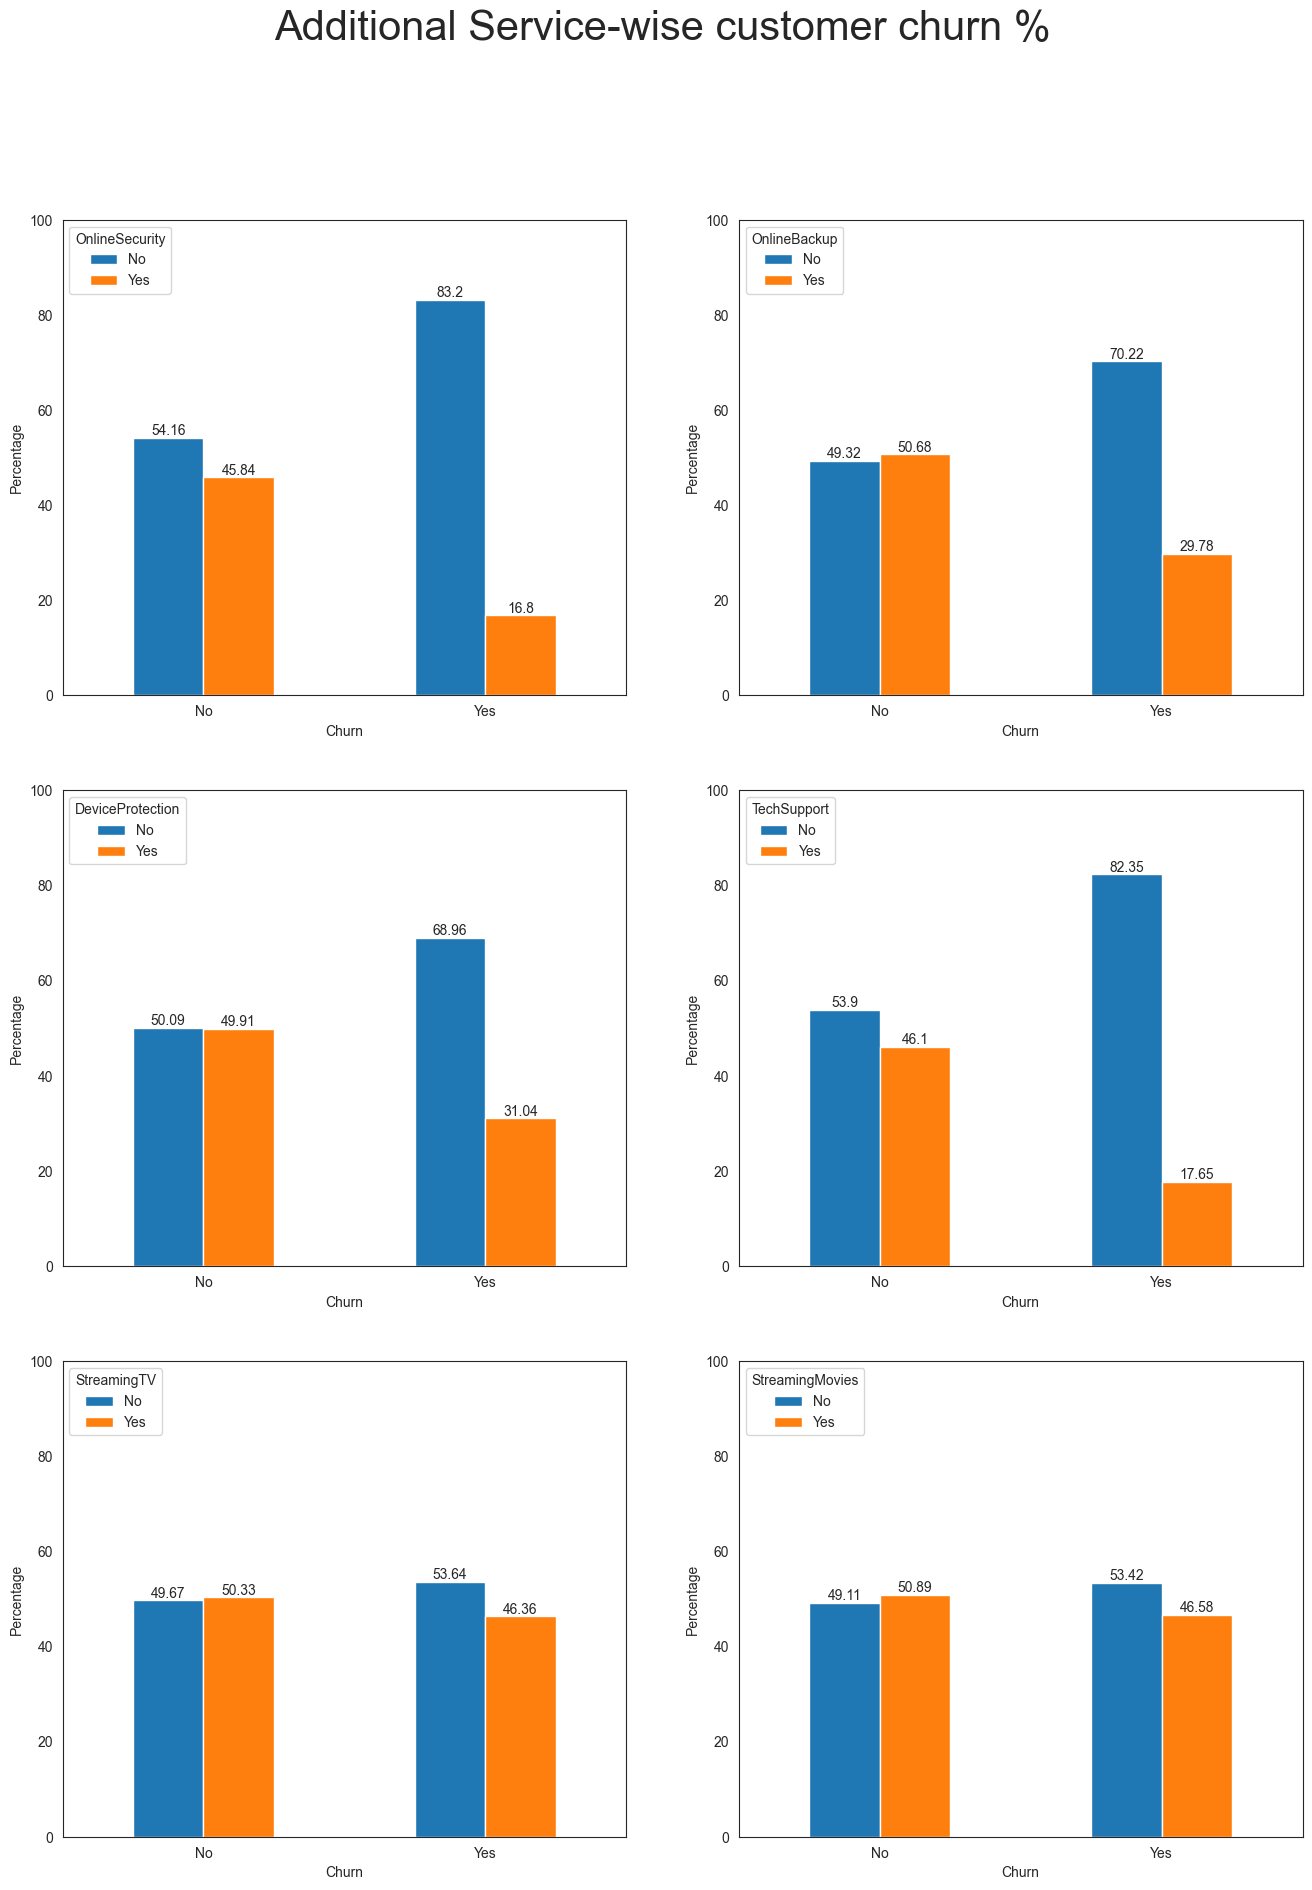

In [38]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 21))

cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
col, row = 0, 0

fig.suptitle("Additional Service-wise customer churn %", fontsize=30)

for i in range(6):
    ax = (pd.crosstab(df_internet["Churn"], df_internet[cols[i]], normalize="index")*100).round(2).plot.bar(rot=0, ylabel="Percentage", ylim=(0, 100), ax=axes[row, col])

    for container in ax.containers:
        ax.bar_label(container)

    ax.legend(loc='upper left', title=cols[i]);
    
    col += 1
    if i == 1:
        col, row = 0, 1
    elif i == 3:
        col, row = 0, 2

___
- **StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault.**
- **OnlineSecurity and TechSupport are the strong points of the operator, customers opting for these service tend to churn less.**
___

### Contracts

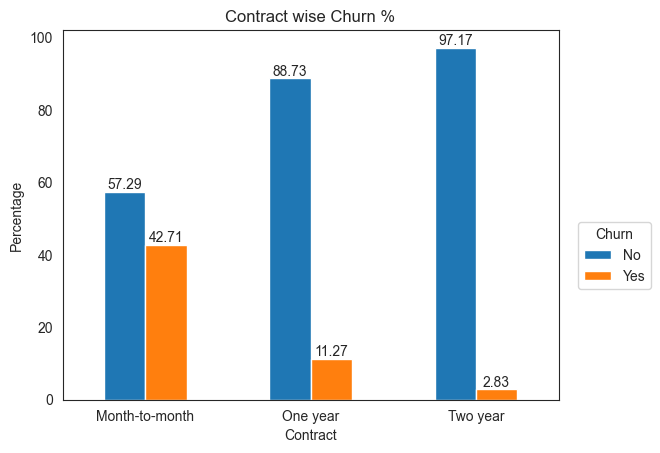

In [39]:
ax =(pd.crosstab(df["Contract"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot=0, color=["#1f77b4", "#ff7f0e"])

for container in ax.containers:
    ax.bar_label(container)

plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.2, 0.5), title="Churn")
plt.title("Contract wise Churn %");

### Paperless Billing

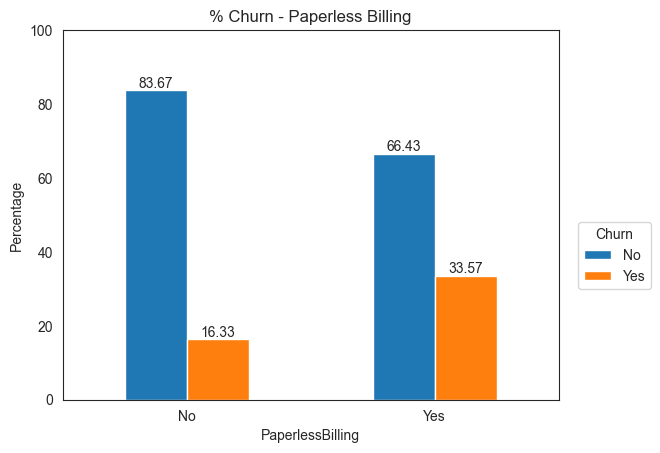

In [40]:
ax=(pd.crosstab(df["PaperlessBilling"], df["Churn"], normalize="index")*100).round(2).plot.bar(rot=0, ylim=(0, 100))

for container in ax.containers:
    ax.bar_label(container)
    
plt.ylabel("Percentage")
plt.title("% Churn - Paperless Billing")
plt.legend(bbox_to_anchor=(1.2, 0.5), title="Churn");

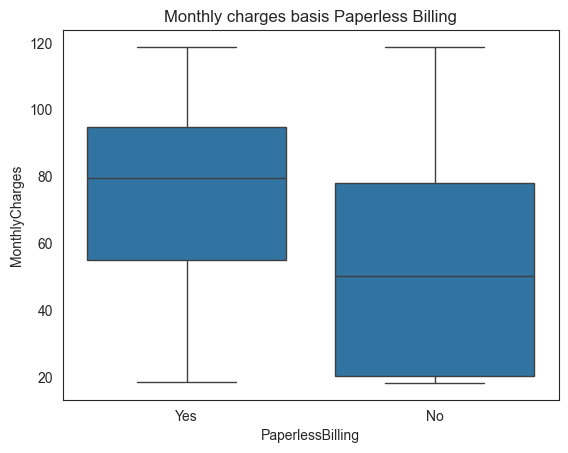

In [41]:
sns.boxplot(data=df, x="PaperlessBilling", y="MonthlyCharges")
plt.title("Monthly charges basis Paperless Billing");

### Payment Methods

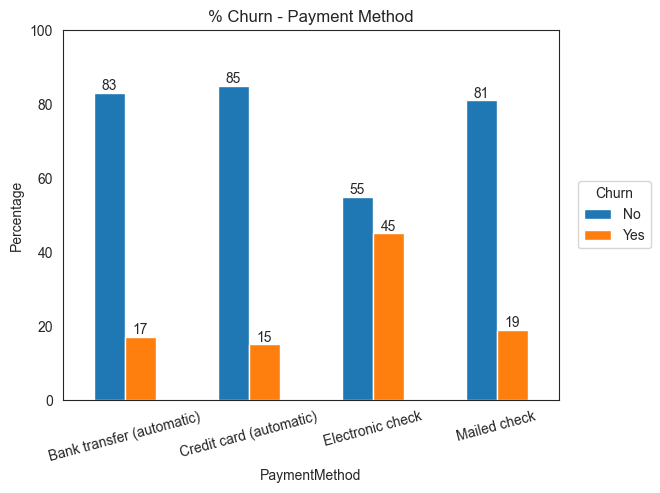

In [42]:
ax = (pd.crosstab(df["PaymentMethod"], df["Churn"], normalize="index").round(2)*100).plot.bar(ylim=(0, 100), rot=15)

for container in ax.containers:
    ax.bar_label(container)
    
plt.ylabel("Percentage")
plt.title("% Churn - Payment Method")
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title="Churn");

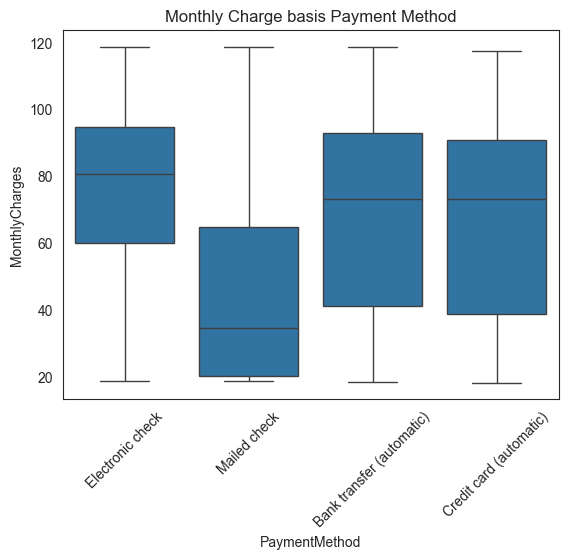

In [43]:
sns.boxplot(data=df, x="PaymentMethod", y="MonthlyCharges")
plt.xticks(rotation=45)
plt.title("Monthly Charge basis Payment Method");

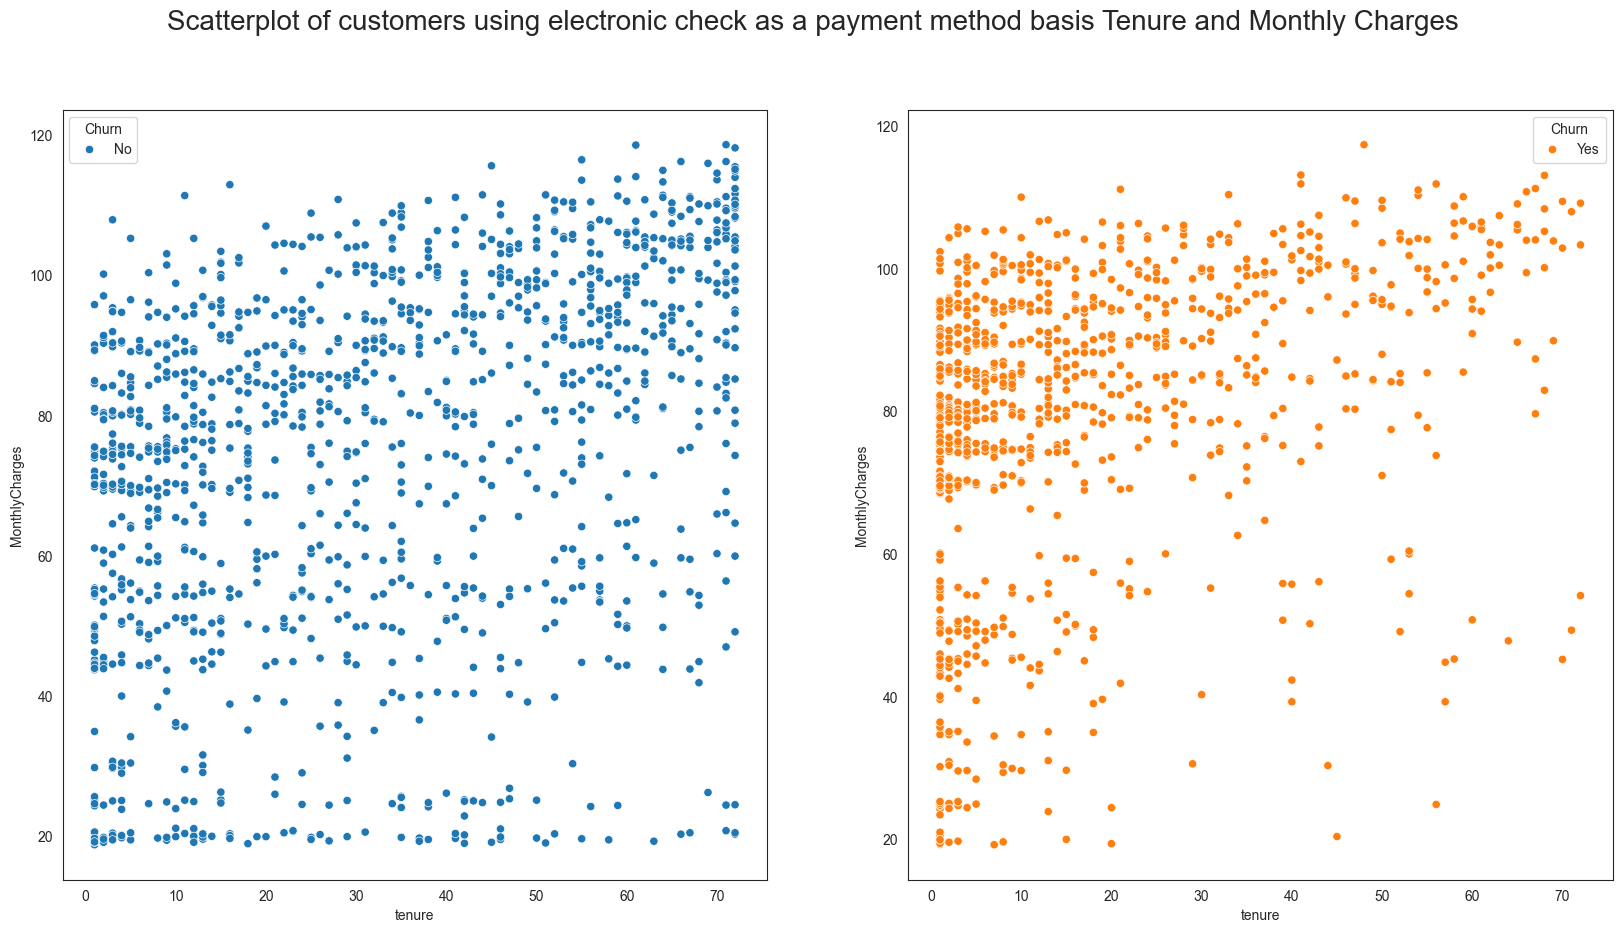

In [44]:
df[df["PaymentMethod"] == "Electronic check"]

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
fig.suptitle("Scatterplot of customers using electronic check as a payment method basis Tenure and Monthly Charges", fontsize=20)

sns.scatterplot(data=df_not_churn[df_not_churn["PaymentMethod"] == "Electronic check"], x="tenure", y="MonthlyCharges", hue="Churn", alpha=1, ax=axes[0]);
sns.scatterplot(data=df_churn[df_churn["PaymentMethod"] == "Electronic check"], x="tenure", y="MonthlyCharges", hue="Churn", alpha=1, ax=axes[1], palette=["#ff7f0e"]);

___
- **Operator need to focus on online self service platform to ensure proper bill delivery and receipt of payments as there seems to be an issue with paperless billing and electronic checks which are both done online**


- **Long term plans to be promoted as there is a lower churn percentage, this can be done by offering a lower rate as compared to the shorter plans.**


- **Depending on the contract, operator can charge an exit levy for customers moving out in a monthly plan**
___

### Charges

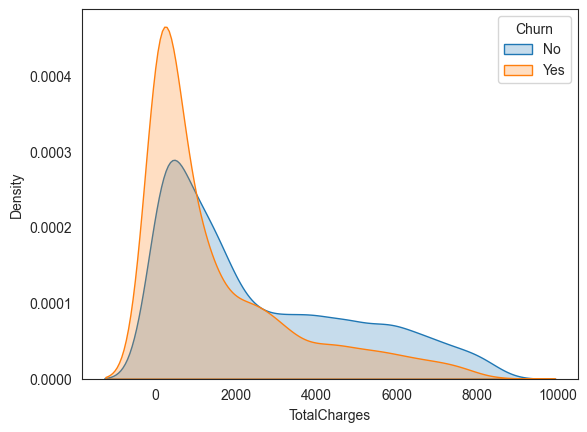

In [45]:
sns.kdeplot(df["TotalCharges"][(df["Churn"] == "No") ], fill = True, label="No")
sns.kdeplot(df["TotalCharges"][(df["Churn"] == "Yes") ], fill= True, label="Yes")
plt.legend(title="Churn");

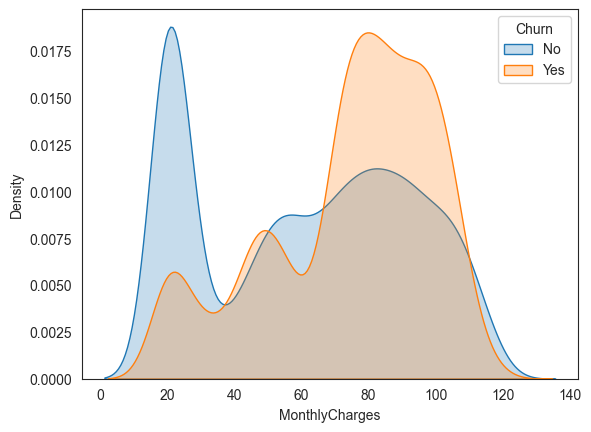

In [46]:
sns.kdeplot(df["MonthlyCharges"][(df["Churn"] == "No") ], fill = True, label="No")
sns.kdeplot(df["MonthlyCharges"][(df["Churn"] == "Yes") ], fill= True, label="Yes")
plt.legend(title="Churn");

##### To find the reason for the dips in graph

In [47]:
df[(df["MonthlyCharges"] <= 20) & (df["MonthlyCharges"] >= 0)].shape[0]

656

In [48]:
df[(df["MonthlyCharges"] <= 30) & (df["MonthlyCharges"] >= 20)].shape[0]

1040

In [49]:
df[(df["MonthlyCharges"] <= 40) & (df["MonthlyCharges"] >= 30)].shape[0]

185

In [50]:
df[(df["MonthlyCharges"] <= 50) & (df["MonthlyCharges"] >= 40)].shape[0]

462

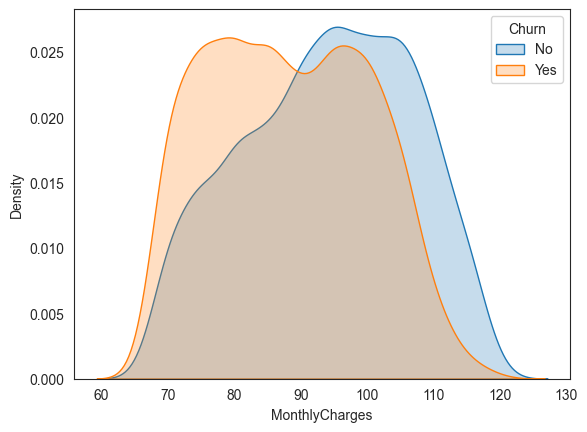

In [51]:
sns.kdeplot(df["MonthlyCharges"][(df["Churn"] == "No") & (df["InternetService"] == "Fiber optic")], fill = True, label="No")
sns.kdeplot(df["MonthlyCharges"][(df["Churn"] == "Yes") & (df["InternetService"] == "Fiber optic")], fill= True, label="Yes")
plt.legend(title="Churn");

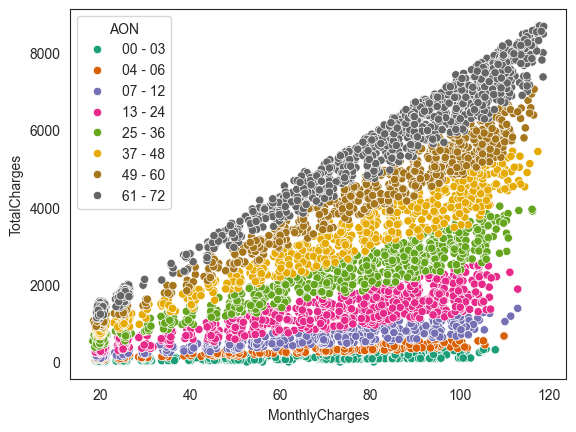

In [52]:
sns.scatterplot(data=df.sort_values("AON"), x='MonthlyCharges',y='TotalCharges',hue='AON',
               alpha=1,linewidth=0.5, palette="Dark2");

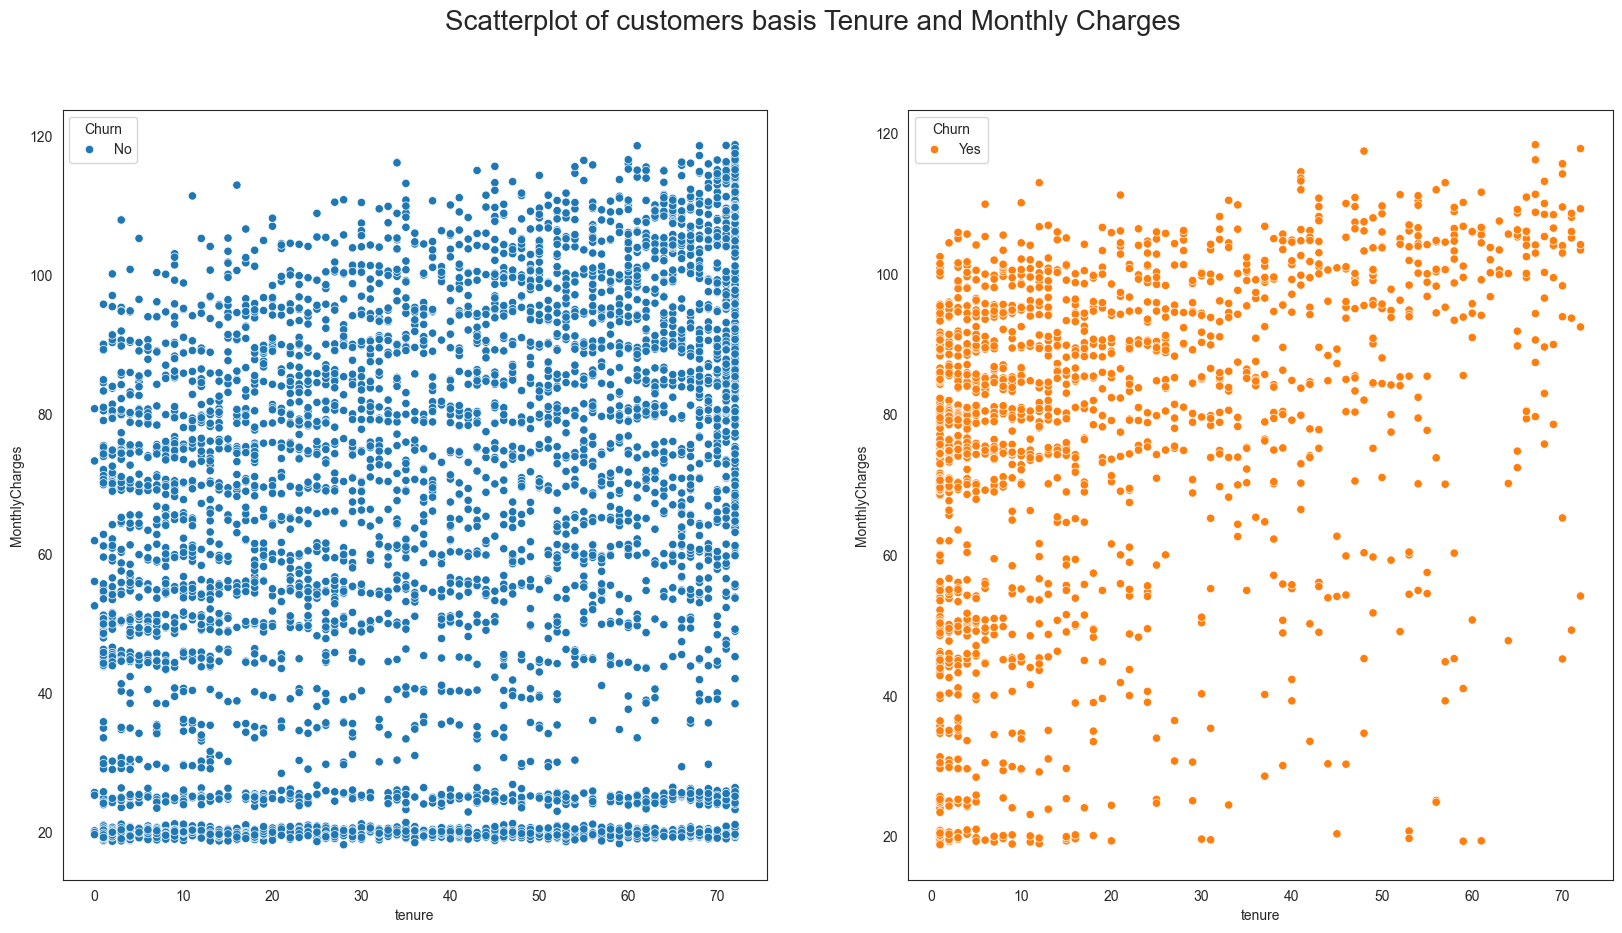

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
fig.suptitle("Scatterplot of customers basis Tenure and Monthly Charges", fontsize=20)

sns.scatterplot(data=df_not_churn, x="tenure", y="MonthlyCharges", hue="Churn", alpha=1, ax=axes[0]);
sns.scatterplot(data=df_churn, x="tenure", y="MonthlyCharges", hue="Churn", alpha=1, ax=axes[1], palette=["#ff7f0e"]);

___
- **Market is price sensitive as there is increase in churn against higher charge.**
- **It is indicative that customers having a high monthly charge during onboarding churn the highest.**
- **Old customers churn rarely and are loyal, but even the few customers that do so have a high monthly charge.**
- **Customers with the base plan(lowest monthly charge) generally do not churn.**
___

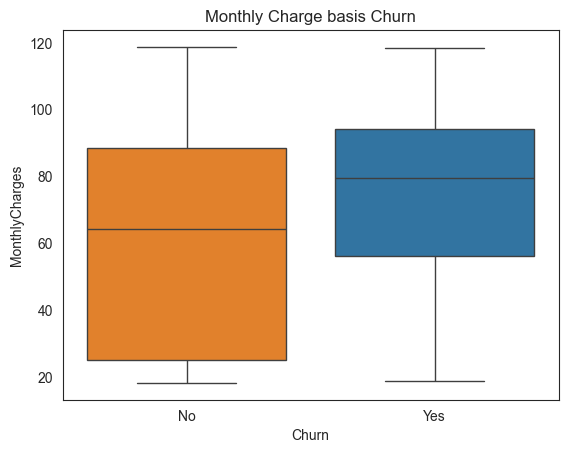

In [54]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette=["#ff7f0e", "#1f77b4"])
plt.title("Monthly Charge basis Churn");

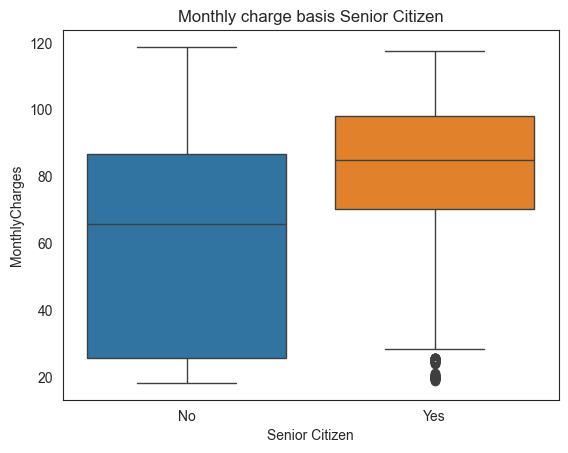

In [55]:
sns.boxplot(data=df, x="SeniorCitizen", y="MonthlyCharges", palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Senior Citizen")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.title("Monthly charge basis Senior Citizen");

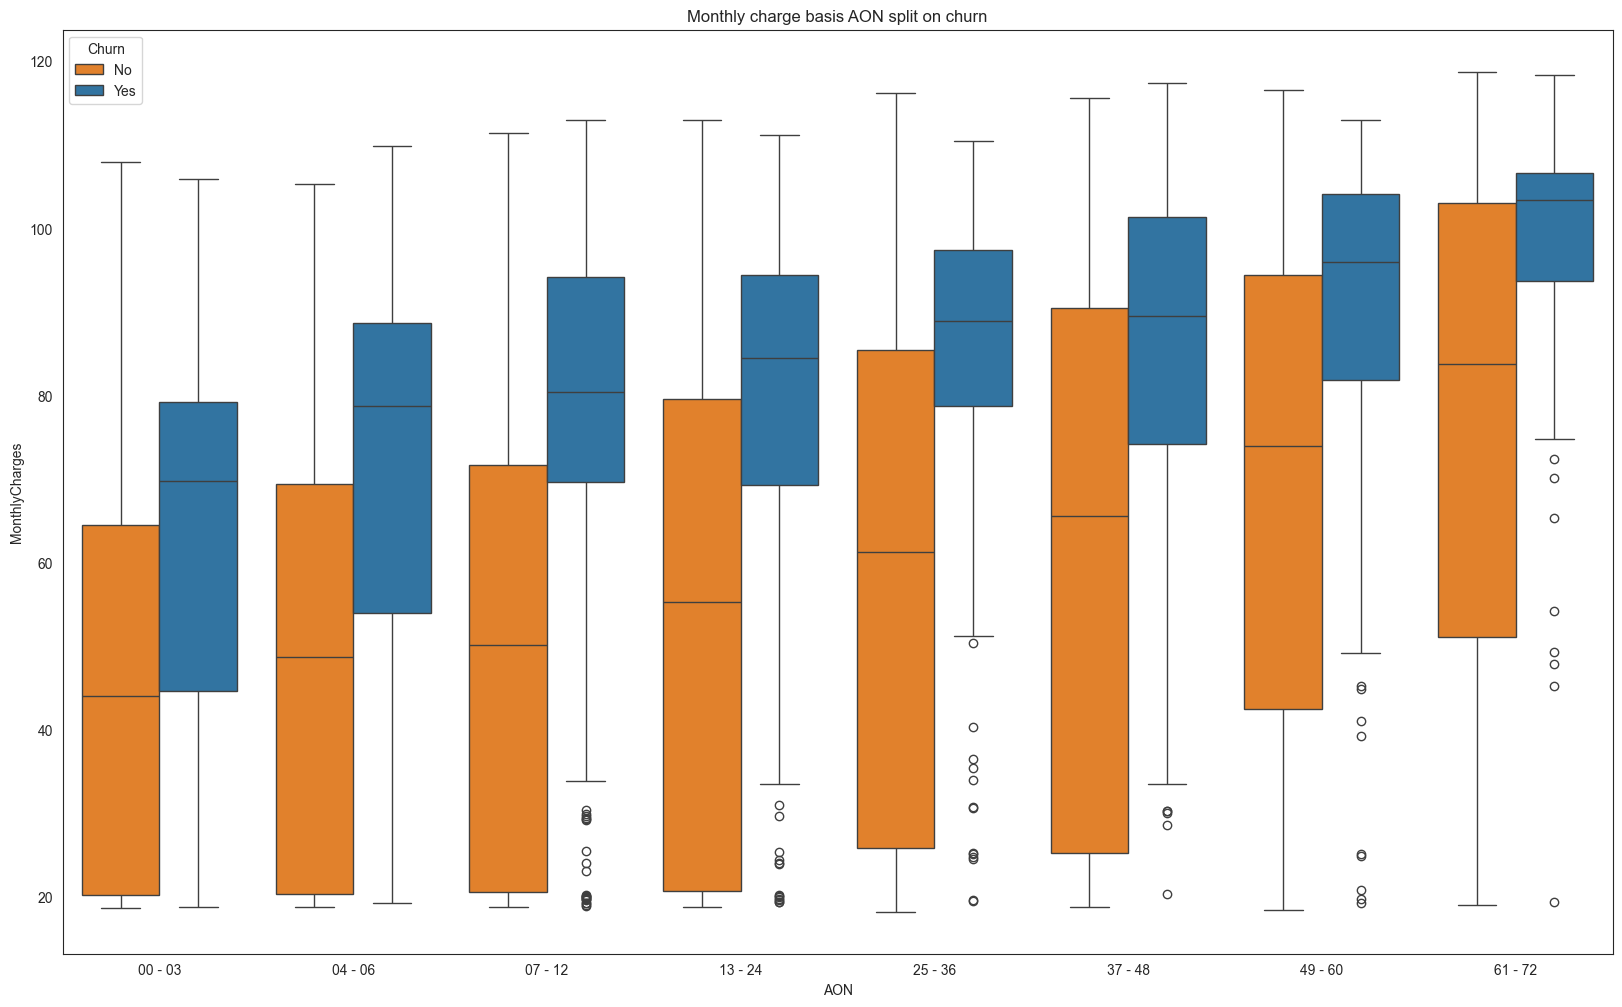

In [56]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.boxplot(data=df.sort_values("AON"), x="AON", y="MonthlyCharges", hue="Churn", palette=["#ff7f0e", "#1f77b4"])
plt.title("Monthly charge basis AON split on churn");

___
**The impact of monthly charges can be better analysed if the data was a continuous data, shared data looks to be a total charges divided by tenure, which can be misleading.**
___

# Analysis

### The EDA showed both strengths and weaknesses of the operator.

**Below are the factors and segments of customers the operator must focus on to reduce churn:**

1. Customers who have onboarded within the last 3 months.
2. There seems to be an issue with the fiber optic as an internet service.
3. Senior citizens without any dependents or partners.
4. Market looks to be price sensitive, customers with high monthly charges are one of the major reasons for churn.
5. Customers with monthly contracts have a higher churn rate as compared to customers with longer contract periods.
6. Customers opting for payments through electronic cheque and paperless billing.

**Strengths of the operator which came out as part of analysis are listed below:**
1. Customers opting for tech support and online security have a lower churn percentage.
2. Customers who cross the 10 months AON churn less.



# Proposed Solutions

1. The operator should review and analyse the pricing and the services offered by other operators in the market and benchmark his offerings to identify reasons for churn, similarly the sale channels followed by other operators should be compared to restrict 0-3 months churn.


2. Price elasticity models should be applied to determine the charges applied for various services.


3. The operator should strategise to maximise its topline and reduce bottom line by marginally reducing the monthly charges which would eventually have a longer AON customers and reduce acquisition cost.


4. To promote long term plans there should be a discount component as compared to monthly charges, for trial purpose a 6 month plan can also be introduced with 15 days rental discount.
    - Only potential risk in long term plans is if the customer defaults in bill payment.
    - There should be an exit charge in case customers are churning out within 12 months of onboarding.
    
    
5. Technical review and analysis for fiber optics service to be done to identify service gaps and take corrective action to improve the service quality.
    - Customers’ complaints for fiber optic service should be analysed to understand the VOC(Voice of Customer) to get an insight into the problem faced by customers.
    - Testing lab to be set up by the operator to experience the services.
    
    
6. Self service platform available to customers needs to be enhanced with a full bouquet of digital payment options and availability of digital bill copies.
    - Improvement in UI/UX for seamless experience.
    - Ease of setting up E-Check (Automated Clearing House) facility on self-service platform and avoid paper based E-check mandate.

# Model Building

## Importing libraries

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from imblearn.over_sampling import SMOTE

## Label Encoding

In [58]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'AON',
       'Number of Additional Services'],
      dtype='object')

In [59]:
def ml_model(X_train, X_test, y_train, y_test):
    models = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42)),
        ('Gaussian Naive Bayes', GaussianNB()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Support Vector Machine', SVC(random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
        ('XGBoost', XGBClassifier(random_state=42)),
        ('LightGBM', LGBMClassifier(random_state=42)),
        ('ADA Boosting', AdaBoostClassifier(random_state=42)),
        ('CAT Boost', CatBoostClassifier(random_state=42))
    ]
    
    results = []

    for model_name, model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        result = {
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
        results.append(result)
        
    return results

In [60]:
X = df.drop(columns=["Churn", "AON", "Number of Additional Services"])
y = df["Churn"].replace({"Yes": 1, "No": 0})

In [61]:
labelencoder = LabelEncoder()
cols = X.select_dtypes(include=["object"])

for col in cols:
    X[col] = labelencoder.fit_transform(X[col])

In [62]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

X = X.apply(lambda x: encode_data(x))

### Handling imbalance data

#### Using Synthetic Minority Oversampling Technique to produce more samples where customers churn out

In [63]:
over = SMOTE(sampling_strategy = 1)
X,y = over.fit_resample(X,y)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state =2, test_size = 0.2)

In [65]:
ss = StandardScaler()
cols = ["MonthlyCharges", "TotalCharges", "tenure"]
x_train[cols] = ss.fit_transform(x_train[cols])

In [66]:
x_test[cols] = ss.transform(x_test[cols])

In [67]:
res = ml_model(x_train, x_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 4144, number of negative: 4134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500604 -> initscore=0.002416
[LightGBM] [Info] Start training from score 0.002416
Learning rate set to 0.025403
0:	learn: 0.6764517	total: 60.1ms	remaining: 1m
1:	learn: 0.6625356	total: 62.2ms	remaining: 31s
2:	learn: 0.6503825	total: 64.4ms	remaining: 21.4s
3:	learn: 0.6377362	total: 66.4ms	remaining: 16.5s
4:	learn: 0.6257189	total: 68.4ms	remaining: 13.6s
5:	learn: 0.6145336	total: 70.3ms	remaining: 11.6s
6:	learn: 0.6041416	total: 72.2ms	remaining: 10.2s
7:	learn: 0.5947806	total: 74ms	remaining: 9.18s
8:	learn: 0.58534

184:	learn: 0.3413928	total: 397ms	remaining: 1.75s
185:	learn: 0.3411466	total: 398ms	remaining: 1.74s
186:	learn: 0.3409603	total: 400ms	remaining: 1.74s
187:	learn: 0.3408238	total: 402ms	remaining: 1.73s
188:	learn: 0.3406594	total: 403ms	remaining: 1.73s
189:	learn: 0.3404621	total: 405ms	remaining: 1.73s
190:	learn: 0.3402474	total: 407ms	remaining: 1.73s
191:	learn: 0.3400741	total: 409ms	remaining: 1.72s
192:	learn: 0.3399043	total: 411ms	remaining: 1.72s
193:	learn: 0.3396742	total: 413ms	remaining: 1.72s
194:	learn: 0.3394421	total: 415ms	remaining: 1.71s
195:	learn: 0.3392339	total: 417ms	remaining: 1.71s
196:	learn: 0.3390728	total: 418ms	remaining: 1.71s
197:	learn: 0.3388121	total: 420ms	remaining: 1.7s
198:	learn: 0.3385367	total: 422ms	remaining: 1.7s
199:	learn: 0.3382807	total: 424ms	remaining: 1.69s
200:	learn: 0.3380218	total: 425ms	remaining: 1.69s
201:	learn: 0.3376756	total: 427ms	remaining: 1.69s
202:	learn: 0.3373369	total: 429ms	remaining: 1.68s
203:	learn: 0.

406:	learn: 0.3043907	total: 797ms	remaining: 1.16s
407:	learn: 0.3042114	total: 798ms	remaining: 1.16s
408:	learn: 0.3040968	total: 800ms	remaining: 1.16s
409:	learn: 0.3039065	total: 802ms	remaining: 1.15s
410:	learn: 0.3037994	total: 803ms	remaining: 1.15s
411:	learn: 0.3036297	total: 805ms	remaining: 1.15s
412:	learn: 0.3034852	total: 807ms	remaining: 1.15s
413:	learn: 0.3033385	total: 809ms	remaining: 1.14s
414:	learn: 0.3032237	total: 810ms	remaining: 1.14s
415:	learn: 0.3031098	total: 812ms	remaining: 1.14s
416:	learn: 0.3029489	total: 814ms	remaining: 1.14s
417:	learn: 0.3028425	total: 816ms	remaining: 1.14s
418:	learn: 0.3027220	total: 818ms	remaining: 1.13s
419:	learn: 0.3025713	total: 820ms	remaining: 1.13s
420:	learn: 0.3024487	total: 821ms	remaining: 1.13s
421:	learn: 0.3023414	total: 823ms	remaining: 1.13s
422:	learn: 0.3022410	total: 825ms	remaining: 1.13s
423:	learn: 0.3021669	total: 827ms	remaining: 1.12s
424:	learn: 0.3020083	total: 829ms	remaining: 1.12s
425:	learn: 

624:	learn: 0.2779526	total: 1.19s	remaining: 716ms
625:	learn: 0.2778770	total: 1.2s	remaining: 715ms
626:	learn: 0.2777616	total: 1.2s	remaining: 713ms
627:	learn: 0.2776978	total: 1.2s	remaining: 711ms
628:	learn: 0.2775214	total: 1.2s	remaining: 709ms
629:	learn: 0.2774411	total: 1.2s	remaining: 708ms
630:	learn: 0.2773772	total: 1.21s	remaining: 706ms
631:	learn: 0.2773102	total: 1.21s	remaining: 704ms
632:	learn: 0.2772250	total: 1.21s	remaining: 703ms
633:	learn: 0.2771038	total: 1.21s	remaining: 701ms
634:	learn: 0.2770259	total: 1.22s	remaining: 699ms
635:	learn: 0.2768763	total: 1.22s	remaining: 697ms
636:	learn: 0.2767973	total: 1.22s	remaining: 695ms
637:	learn: 0.2767322	total: 1.22s	remaining: 694ms
638:	learn: 0.2766451	total: 1.23s	remaining: 692ms
639:	learn: 0.2765334	total: 1.23s	remaining: 691ms
640:	learn: 0.2764256	total: 1.23s	remaining: 689ms
641:	learn: 0.2762707	total: 1.23s	remaining: 688ms
642:	learn: 0.2762108	total: 1.24s	remaining: 686ms
643:	learn: 0.276

798:	learn: 0.2606478	total: 1.59s	remaining: 400ms
799:	learn: 0.2605086	total: 1.59s	remaining: 398ms
800:	learn: 0.2604653	total: 1.59s	remaining: 396ms
801:	learn: 0.2603331	total: 1.59s	remaining: 394ms
802:	learn: 0.2602777	total: 1.59s	remaining: 391ms
803:	learn: 0.2601604	total: 1.6s	remaining: 389ms
804:	learn: 0.2600620	total: 1.6s	remaining: 388ms
805:	learn: 0.2599571	total: 1.6s	remaining: 386ms
806:	learn: 0.2598829	total: 1.6s	remaining: 384ms
807:	learn: 0.2597733	total: 1.61s	remaining: 382ms
808:	learn: 0.2596786	total: 1.61s	remaining: 380ms
809:	learn: 0.2596360	total: 1.61s	remaining: 378ms
810:	learn: 0.2595869	total: 1.61s	remaining: 376ms
811:	learn: 0.2595363	total: 1.61s	remaining: 374ms
812:	learn: 0.2594066	total: 1.62s	remaining: 372ms
813:	learn: 0.2593353	total: 1.62s	remaining: 370ms
814:	learn: 0.2592580	total: 1.62s	remaining: 368ms
815:	learn: 0.2591771	total: 1.62s	remaining: 366ms
816:	learn: 0.2590968	total: 1.62s	remaining: 364ms
817:	learn: 0.25

976:	learn: 0.2456193	total: 1.98s	remaining: 46.6ms
977:	learn: 0.2455140	total: 1.98s	remaining: 44.6ms
978:	learn: 0.2454575	total: 1.98s	remaining: 42.6ms
979:	learn: 0.2453763	total: 1.99s	remaining: 40.6ms
980:	learn: 0.2452878	total: 1.99s	remaining: 38.5ms
981:	learn: 0.2452246	total: 1.99s	remaining: 36.5ms
982:	learn: 0.2451347	total: 1.99s	remaining: 34.5ms
983:	learn: 0.2450593	total: 1.99s	remaining: 32.4ms
984:	learn: 0.2449641	total: 2s	remaining: 30.4ms
985:	learn: 0.2448696	total: 2s	remaining: 28.4ms
986:	learn: 0.2447666	total: 2s	remaining: 26.4ms
987:	learn: 0.2446618	total: 2s	remaining: 24.3ms
988:	learn: 0.2445550	total: 2s	remaining: 22.3ms
989:	learn: 0.2444755	total: 2.01s	remaining: 20.3ms
990:	learn: 0.2443414	total: 2.01s	remaining: 18.3ms
991:	learn: 0.2442803	total: 2.01s	remaining: 16.2ms
992:	learn: 0.2441422	total: 2.01s	remaining: 14.2ms
993:	learn: 0.2440912	total: 2.02s	remaining: 12.2ms
994:	learn: 0.2439668	total: 2.02s	remaining: 10.1ms
995:	lea

In [68]:
pd.DataFrame(res).sort_values("F1 Score", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
2,Random Forest,0.852657,0.846227,0.860194,0.853154
8,LightGBM,0.846377,0.837761,0.857282,0.847409
10,CAT Boost,0.844928,0.837941,0.853398,0.845599
7,XGBoost,0.841546,0.833650,0.851456,0.842459
6,Gradient Boosting,0.832367,0.811872,0.863107,0.836706
5,Support Vector Machine,0.830435,0.818182,0.847573,0.832618
9,ADA Boosting,0.821256,0.788967,0.874757,0.829650
4,K-Nearest Neighbors,0.820290,0.788091,0.873786,0.828729
0,Logistic Regression,0.808696,0.781528,0.854369,0.816327
1,Decision Tree,0.813527,0.809615,0.817476,0.813527


In [69]:
pd.DataFrame(res).sort_values("Recall", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
9,ADA Boosting,0.821256,0.788967,0.874757,0.829650
4,K-Nearest Neighbors,0.820290,0.788091,0.873786,0.828729
6,Gradient Boosting,0.832367,0.811872,0.863107,0.836706
2,Random Forest,0.852657,0.846227,0.860194,0.853154
8,LightGBM,0.846377,0.837761,0.857282,0.847409
0,Logistic Regression,0.808696,0.781528,0.854369,0.816327
10,CAT Boost,0.844928,0.837941,0.853398,0.845599
7,XGBoost,0.841546,0.833650,0.851456,0.842459
5,Support Vector Machine,0.830435,0.818182,0.847573,0.832618
3,Gaussian Naive Bayes,0.776812,0.753571,0.819417,0.785116


## One Hot Encoding

In [70]:
X = df.drop(columns=["Churn", "AON", "Number of Additional Services"])
y = df["Churn"].replace({"Yes": 1, "No": 0})
X = pd.get_dummies(X).replace({True: 1, False: 0})

In [71]:
over = SMOTE(sampling_strategy = 1)
X,y = over.fit_resample(X,y)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

In [73]:
ss = StandardScaler()
mm = MinMaxScaler()
cols = ["MonthlyCharges", "TotalCharges", "tenure"]
x_train[cols] = mm.fit_transform(x_train[cols])

In [74]:
x_test[cols] = mm.transform(x_test[cols])

In [75]:
res = ml_model(x_train, x_test, y_train, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4144, number of negative: 4134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500604 -> initscore=0.002416
[LightGBM] [Info] Start training from score 0.002416
Learning rate set to 0.025403
0:	learn: 0.6757263	total: 3.06ms	remaining: 3.05s
1:	learn: 0.6595030	total: 5.33ms	remaining: 2.66s
2:	learn: 0.6474982	total: 7.62ms	remaining: 2.53s
3:	learn: 0.6325573	total: 10ms	remaining: 2.5s
4:	learn: 0.6190826	total: 12.5ms	remaining: 2.48s
5:	learn: 0.6058962	total: 14.8ms	remaining: 2.45s
6:	learn: 0.5919306	total: 17.1ms	r

166:	learn: 0.2942417	total: 400ms	remaining: 1.99s
167:	learn: 0.2941160	total: 402ms	remaining: 1.99s
168:	learn: 0.2939350	total: 404ms	remaining: 1.99s
169:	learn: 0.2937277	total: 407ms	remaining: 1.99s
170:	learn: 0.2935124	total: 409ms	remaining: 1.98s
171:	learn: 0.2933383	total: 412ms	remaining: 1.98s
172:	learn: 0.2931330	total: 414ms	remaining: 1.98s
173:	learn: 0.2929167	total: 417ms	remaining: 1.98s
174:	learn: 0.2927455	total: 419ms	remaining: 1.98s
175:	learn: 0.2925903	total: 422ms	remaining: 1.97s
176:	learn: 0.2920557	total: 425ms	remaining: 1.97s
177:	learn: 0.2918935	total: 428ms	remaining: 1.97s
178:	learn: 0.2917684	total: 430ms	remaining: 1.97s
179:	learn: 0.2916000	total: 433ms	remaining: 1.97s
180:	learn: 0.2914507	total: 436ms	remaining: 1.97s
181:	learn: 0.2913443	total: 439ms	remaining: 1.97s
182:	learn: 0.2912011	total: 441ms	remaining: 1.97s
183:	learn: 0.2910736	total: 444ms	remaining: 1.97s
184:	learn: 0.2907831	total: 447ms	remaining: 1.97s
185:	learn: 

334:	learn: 0.2676182	total: 798ms	remaining: 1.58s
335:	learn: 0.2675100	total: 800ms	remaining: 1.58s
336:	learn: 0.2674139	total: 803ms	remaining: 1.58s
337:	learn: 0.2672931	total: 805ms	remaining: 1.58s
338:	learn: 0.2671254	total: 807ms	remaining: 1.57s
339:	learn: 0.2670182	total: 810ms	remaining: 1.57s
340:	learn: 0.2668948	total: 812ms	remaining: 1.57s
341:	learn: 0.2667930	total: 815ms	remaining: 1.57s
342:	learn: 0.2666265	total: 818ms	remaining: 1.57s
343:	learn: 0.2665234	total: 821ms	remaining: 1.56s
344:	learn: 0.2663900	total: 823ms	remaining: 1.56s
345:	learn: 0.2662281	total: 825ms	remaining: 1.56s
346:	learn: 0.2660796	total: 828ms	remaining: 1.56s
347:	learn: 0.2659811	total: 830ms	remaining: 1.55s
348:	learn: 0.2657739	total: 832ms	remaining: 1.55s
349:	learn: 0.2656178	total: 834ms	remaining: 1.55s
350:	learn: 0.2654564	total: 836ms	remaining: 1.55s
351:	learn: 0.2653784	total: 839ms	remaining: 1.54s
352:	learn: 0.2652804	total: 841ms	remaining: 1.54s
353:	learn: 

500:	learn: 0.2478840	total: 1.2s	remaining: 1.19s
501:	learn: 0.2477276	total: 1.2s	remaining: 1.19s
502:	learn: 0.2475990	total: 1.2s	remaining: 1.19s
503:	learn: 0.2475348	total: 1.2s	remaining: 1.18s
504:	learn: 0.2474807	total: 1.21s	remaining: 1.18s
505:	learn: 0.2472597	total: 1.21s	remaining: 1.18s
506:	learn: 0.2471881	total: 1.21s	remaining: 1.18s
507:	learn: 0.2470496	total: 1.21s	remaining: 1.18s
508:	learn: 0.2469994	total: 1.22s	remaining: 1.17s
509:	learn: 0.2468427	total: 1.22s	remaining: 1.17s
510:	learn: 0.2467786	total: 1.22s	remaining: 1.17s
511:	learn: 0.2467172	total: 1.22s	remaining: 1.17s
512:	learn: 0.2466614	total: 1.23s	remaining: 1.16s
513:	learn: 0.2465601	total: 1.23s	remaining: 1.16s
514:	learn: 0.2464834	total: 1.23s	remaining: 1.16s
515:	learn: 0.2463622	total: 1.23s	remaining: 1.16s
516:	learn: 0.2462721	total: 1.24s	remaining: 1.16s
517:	learn: 0.2461903	total: 1.24s	remaining: 1.15s
518:	learn: 0.2460513	total: 1.24s	remaining: 1.15s
519:	learn: 0.24

667:	learn: 0.2304599	total: 1.6s	remaining: 794ms
668:	learn: 0.2303978	total: 1.6s	remaining: 792ms
669:	learn: 0.2302983	total: 1.6s	remaining: 790ms
670:	learn: 0.2302421	total: 1.6s	remaining: 787ms
671:	learn: 0.2301179	total: 1.61s	remaining: 785ms
672:	learn: 0.2300768	total: 1.61s	remaining: 782ms
673:	learn: 0.2300024	total: 1.61s	remaining: 780ms
674:	learn: 0.2298966	total: 1.61s	remaining: 778ms
675:	learn: 0.2298256	total: 1.62s	remaining: 776ms
676:	learn: 0.2297472	total: 1.62s	remaining: 773ms
677:	learn: 0.2296698	total: 1.62s	remaining: 771ms
678:	learn: 0.2296196	total: 1.63s	remaining: 768ms
679:	learn: 0.2295506	total: 1.63s	remaining: 766ms
680:	learn: 0.2294568	total: 1.63s	remaining: 764ms
681:	learn: 0.2293714	total: 1.63s	remaining: 761ms
682:	learn: 0.2292721	total: 1.63s	remaining: 759ms
683:	learn: 0.2291062	total: 1.64s	remaining: 756ms
684:	learn: 0.2289765	total: 1.64s	remaining: 754ms
685:	learn: 0.2289234	total: 1.64s	remaining: 751ms
686:	learn: 0.22

833:	learn: 0.2168382	total: 2s	remaining: 398ms
834:	learn: 0.2167359	total: 2s	remaining: 395ms
835:	learn: 0.2166847	total: 2s	remaining: 393ms
836:	learn: 0.2166293	total: 2s	remaining: 391ms
837:	learn: 0.2165326	total: 2.01s	remaining: 388ms
838:	learn: 0.2164777	total: 2.01s	remaining: 386ms
839:	learn: 0.2164197	total: 2.01s	remaining: 383ms
840:	learn: 0.2163263	total: 2.02s	remaining: 381ms
841:	learn: 0.2163028	total: 2.02s	remaining: 379ms
842:	learn: 0.2162217	total: 2.02s	remaining: 376ms
843:	learn: 0.2161482	total: 2.02s	remaining: 374ms
844:	learn: 0.2161105	total: 2.03s	remaining: 372ms
845:	learn: 0.2159879	total: 2.03s	remaining: 369ms
846:	learn: 0.2159180	total: 2.03s	remaining: 367ms
847:	learn: 0.2158743	total: 2.03s	remaining: 364ms
848:	learn: 0.2158113	total: 2.04s	remaining: 362ms
849:	learn: 0.2157335	total: 2.04s	remaining: 360ms
850:	learn: 0.2156101	total: 2.04s	remaining: 357ms
851:	learn: 0.2155222	total: 2.04s	remaining: 355ms
852:	learn: 0.2154715	to

999:	learn: 0.2044296	total: 2.4s	remaining: 0us


# Hyperparameter tuning 

In [76]:
# lgbm = LGBMClassifier(random_state=42)

# param_grid = {
#     'learning_rate': [0.1, 0.01],
#     'n_estimators': [50, 100, 150],
#     'max_depth': [4, 6],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'subsample': [0.7, 0.8, 0.9],
#     'min_child_samples': [1, 5, 10]
# }

# GS = GridSearchCV(estimator=lgbm, 
#                   param_grid=param_grid, 
#                   scoring="f1", 
#                   cv=6, 
#                   refit="f1", 
#                   verbose=4)

# GS.fit(x_train, y_train)

# GS.best_params_

# {'colsample_bytree': 0.9,
#  'learning_rate': 0.1,
#  'max_depth': 6,
#  'min_child_samples': 1,
#  'n_estimators': 150,
#  'subsample': 0.7}

In [77]:
lgbm = LGBMClassifier(random_state=42, colsample_bytree=0.9, learning_rate=0.1, max_depth=6, min_child_samples=1, n_estimators=150, subsample=0.7)

lgbm.fit(x_train, y_train)
predictions = lgbm.predict(x_test)

print("ROC AUC: ", '{:.4%}'.format(roc_auc_score(y_test, predictions)))
print("Model accuracy: ", '{:.4%}'.format(accuracy_score(y_test, predictions)))
print("Precision: ", '{:.4%}'.format(precision_score(y_test, predictions)))
print("Recall: ", '{:.4%}'.format(recall_score(y_test, predictions)))
print("F1 Score: ", '{:.4%}'.format(f1_score(y_test, predictions)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4144, number of negative: 4134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500604 -> initscore=0.002416
[LightGBM] [Info] Start training from score 0.002416
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_lea

In [78]:
# xgb = XGBClassifier(random_state=42)

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# GS = GridSearchCV(estimator=xgb, 
#                   param_grid=params, 
#                   scoring="f1", 
#                   cv=6, 
#                   refit="f1", 
#                   verbose=4)

# GS.fit(x_train, y_train)

# GS.best_params_

# {'colsample_bytree': 1.0,
#  'gamma': 1,
#  'max_depth': 5,
#  'min_child_weight': 5,
#  'subsample': 0.8}

In [79]:
xgb = XGBClassifier(random_state=42, colsample_bytree=1, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8)

xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

print("ROC AUC: ", '{:.4%}'.format(roc_auc_score(y_test, predictions)))
print("Model accuracy: ", '{:.4%}'.format(accuracy_score(y_test, predictions)))
print("Precision: ", '{:.4%}'.format(precision_score(y_test, predictions)))
print("Recall: ", '{:.4%}'.format(recall_score(y_test, predictions)))
print("F1 Score: ", '{:.4%}'.format(f1_score(y_test, predictions)))

ROC AUC:  85.1167%
Model accuracy:  85.1208%
Precision:  85.6016%
Recall:  84.2718%
F1 Score:  84.9315%


In [80]:
# ada = AdaBoostClassifier(random_state=42)

# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# grid_search = GridSearchCV(estimator=ada, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')

# grid_search.fit(x_train, y_train)

# grid_search.best_params_

# {'learning_rate': 1.0, 'n_estimators': 100}

In [81]:
ada = AdaBoostClassifier(random_state=42, learning_rate=1, n_estimators=100, )

ada.fit(x_train, y_train)
predictions = ada.predict(x_test)

print("ROC AUC: ", '{:.4%}'.format(roc_auc_score(y_test, predictions)))
print("Model accuracy: ", '{:.4%}'.format(accuracy_score(y_test, predictions)))
print("Precision: ", '{:.4%}'.format(precision_score(y_test, predictions)))
print("Recall: ", '{:.4%}'.format(recall_score(y_test, predictions)))
print("F1 Score: ", '{:.4%}'.format(f1_score(y_test, predictions)))

ROC AUC:  85.1204%
Model accuracy:  85.1208%
Precision:  85.0485%
Recall:  85.0485%
F1 Score:  85.0485%


In [82]:
# gbc = GradientBoostingClassifier()

# parameters = {
#     "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }

# GS = GridSearchCV(estimator=gbc, 
#                   param_grid=parameters, 
#                   scoring="f1", 
#                   cv=6, 
#                   refit="f1", 
#                   verbose=4)

# GS.fit(x_train, y_train)

# GS.best_params_

# {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [83]:
gbc = GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=3, n_estimators=250)

gbc.fit(x_train, y_train)
predictions = gbc.predict(x_test)

print("ROC AUC: ", '{:.4%}'.format(roc_auc_score(y_test, predictions)))
print("Model accuracy: ", '{:.4%}'.format(accuracy_score(y_test, predictions)))
print("Precision: ", '{:.4%}'.format(precision_score(y_test, predictions)))
print("Recall: ", '{:.4%}'.format(recall_score(y_test, predictions)))
print("F1 Score: ", '{:.4%}'.format(f1_score(y_test, predictions)))

ROC AUC:  85.0201%
Model accuracy:  85.0242%
Precision:  85.5030%
Recall:  84.1748%
F1 Score:  84.8337%


## Final Machine Learning Model - GradientBoosting

In [84]:
X = df.drop(columns=["Churn", "AON", "Number of Additional Services"])
y = df["Churn"].replace({"Yes": 1, "No": 0})
X = pd.get_dummies(X).replace({True: 1, False: 0})

In [85]:
over = SMOTE(sampling_strategy = 1)
X,y = over.fit_resample(X,y)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

In [87]:
ss = StandardScaler()
mm = MinMaxScaler()
cols = ["MonthlyCharges", "TotalCharges", "tenure"]
x_train[cols] = mm.fit_transform(x_train[cols])

In [88]:
x_test[cols] = mm.transform(x_test[cols])

ROC AUC:  85.2656%
Model accuracy:  85.2657%
Precision:  85.1600%
Recall:  85.2427%
F1 Score:  85.2014%


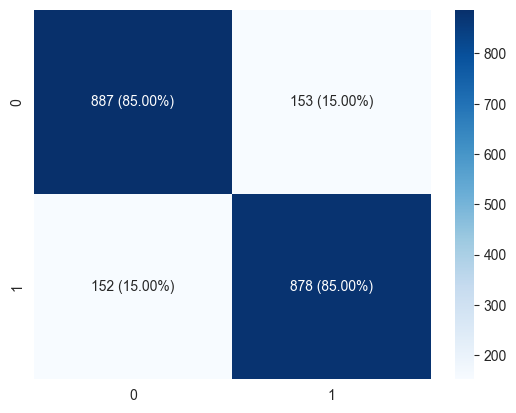

In [89]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(x_train, y_train)
predictions = gbc.predict(x_test)

print("ROC AUC: ", '{:.4%}'.format(roc_auc_score(y_test, predictions)))
print("Model accuracy: ", '{:.4%}'.format(accuracy_score(y_test, predictions)))
print("Precision: ", '{:.4%}'.format(precision_score(y_test, predictions)))
print("Recall: ", '{:.4%}'.format(recall_score(y_test, predictions)))
print("F1 Score: ", '{:.4%}'.format(f1_score(y_test, predictions)))

c_matrix = confusion_matrix(y_test, predictions)
    
percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
labels = np.asarray(labels)

sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues');

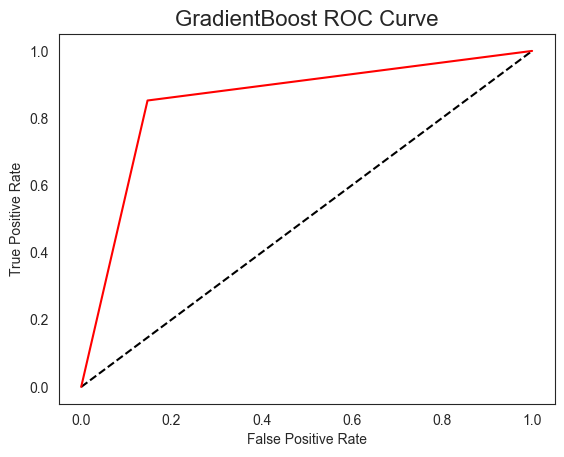

In [90]:
predictions = gbc.predict(x_test)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, predictions)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='GradientBoost Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoost ROC Curve',fontsize=16)
plt.show();

In [91]:
k = 5  
k_fold = KFold(n_splits = k, random_state = None)  
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train, y_train)  
  
score = cross_val_score(gbc, x_test, y_test, cv = k_fold)  
  
mean_acc_score = sum(score) / len(score)  
   
print("Accuracy score of each fold: ", score)  
print("Mean accuracy score: ", mean_acc_score)  

Accuracy score of each fold:  [0.83574879 0.852657   0.86231884 0.84299517 0.83574879]
Mean accuracy score:  0.8458937198067632


In [92]:
pd.DataFrame({"features": x_train.columns, "importance":gbc.feature_importances_}).sort_values("importance", ascending=False)

,features,importance
36,Contract_Month-to-month,0.232009
37,Contract_One year,0.124859
1,tenure,0.111246
38,Contract_Two year,0.056958
39,PaperlessBilling_No,0.051438
16,InternetService_Fiber optic,0.039466
20,OnlineSecurity_Yes,0.036799
29,TechSupport_Yes,0.031771
44,PaymentMethod_Mailed check,0.024997
2,MonthlyCharges,0.024796
